In [2]:
import pandas as pd
import collections
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

In [3]:
# The data frame is called house_info
raw_info = pd.read_csv("kc_house_data.csv",error_bad_lines=False)

In [4]:
raw_info

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0         NaN   0.0  ...      7        1180   
1          7242     2.0         0.0   0.0  ...      7        2170   
2         10000     1.0         0.0   0.0  ...      6         770   
3          5000     1.0         0.0   0.0  ...      7        1050   
4          8080     1.0         0.0   0.0  ...      8        1680   
...         ...     ...         ...   ...  ...    ...         ...   
21592      1131     3.0         0.0   0.0  ...      8        1530   
21593      5813     2.0         0.0   0.0  ...      8        2310   
21594      1350     2.0         0.0   0.0  ...      7        1020   
21595      2388     2.0         NaN   0.0  ...      8        1600   
21596      1076     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [179]:
house_info = pd.DataFrame({'Bedrooms':raw_info.bedrooms, 'Bathrooms':raw_info.bathrooms, 'Floors':raw_info.floors, 
                           'Year Built':raw_info.yr_built, 'Year Renoveted':raw_info.yr_renovated,
                           'Size of Basement':raw_info.sqft_basement,'Condition':raw_info.condition,
                          'Size of Above':raw_info.sqft_above,'Location':raw_info.zipcode,
                          'Price':raw_info.price, 'Sqft_living':raw_info.sqft_living,'Sqft_lot':raw_info.sqft_lot,
                          'Sqft_basement':raw_info.sqft_basement})

In [180]:
house_info

Bedrooms  Bathrooms  Floors  Year Built  Year Renoveted  \
0             3       1.00     1.0        1955             0.0   
1             3       2.25     2.0        1951          1991.0   
2             2       1.00     1.0        1933             NaN   
3             4       3.00     1.0        1965             0.0   
4             3       2.00     1.0        1987             0.0   
...         ...        ...     ...         ...             ...   
21592         3       2.50     3.0        2009             0.0   
21593         4       2.50     2.0        2014             0.0   
21594         2       0.75     2.0        2009             0.0   
21595         3       2.50     2.0        2004             0.0   
21596         2       0.75     2.0        2008             0.0   

      Size of Basement  Condition  Size of Above  Location     Price  \
0                  0.0          3           1180     98178  221900.0   
1                400.0          3           2170     98125  538000.0   
2                  0.0          3            770     98028  180000.0   
3                910.0          5           1050     98136  604000.0   
4                  0.0          3           1680     98074  510000.0   
...                ...        ...            ...       ...       ...   
21592              0.0          3           1530     98103  360000.0   
21593              0.0          3           2310     98146  400000.0   
21594              0.0          3           1020     98144  402101.0   
21595              0.0          3           1600     98027  400000.0   
21596              0.0          3           1020     98144  325000.0   

       Sqft_living  Sqft_lot Sqft_basement  
0             1180      5650           0.0  
1             2570      7242         400.0  
2              770     10000           0.0  
3             1960      5000         910.0  
4             1680      8080           0.0  
...            ...       ...           ...  
21592         1530      1131           0.0  
21593         2310      5813           0.0  
21594         1020      1350           0.0  
21595         1600      2388           0.0  
21596         1020      1076           0.0  

[21597 rows x 13 columns]

In [7]:
house_info.describe()

Bedrooms     Bathrooms        Floors    Year Built  Year Renoveted  \
count  21597.000000  21597.000000  21597.000000  21597.000000    17755.000000   
mean       3.373200      2.115826      1.494096   1970.999676       83.636778   
std        0.926299      0.768984      0.539683     29.375234      399.946414   
min        1.000000      0.500000      1.000000   1900.000000        0.000000   
25%        3.000000      1.750000      1.000000   1951.000000        0.000000   
50%        3.000000      2.250000      1.500000   1975.000000        0.000000   
75%        4.000000      2.500000      2.000000   1997.000000        0.000000   
max       33.000000      8.000000      3.500000   2015.000000     2015.000000   

          Condition  Size of Above      Location         Price  
count  21597.000000   21597.000000  21597.000000  2.159700e+04  
mean       3.409825    1788.596842  98077.951845  5.402966e+05  
std        0.650546     827.759761     53.513072  3.673681e+05  
min        1.000000     370.000000  98001.000000  7.800000e+04  
25%        3.000000    1190.000000  98033.000000  3.220000e+05  
50%        3.000000    1560.000000  98065.000000  4.500000e+05  
75%        4.000000    2210.000000  98118.000000  6.450000e+05  
max        5.000000    9410.000000  98199.000000  7.700000e+06

In [8]:
location =raw_info.zipcode

In [9]:
index = []
for i,x in enumerate(raw_info.lat):
    if x == 47.7400:index.append(i)
    if x == 47.7556:index.append(i)
    if x == 47.7542:index.append(i)  
    if x == 47.6739:index.append(i)
    if x == 47.7532:index.append(i)
    if x == 47.7716:index.append(i)    
index

[1710,
 2428,
 2961,
 3271,
 4025,
 5056,
 6510,
 7265,
 8304,
 9285,
 10138,
 11304,
 11559,
 12126,
 13415,
 13542,
 15592,
 16270,
 16426]

In [10]:
for x,i in enumerate(index):print(x,location[i])

0 98133
1 98155
2 98177
3 98115
4 98107
5 98133
6 98155
7 98033
8 98133
9 98103
10 98072
11 98028
12 98072
13 98077
14 98155
15 98133
16 98077
17 98177
18 98072


In [11]:
def PRICE_BEDROOM(AMOUNT_BEDROOM):
    
    locations = house_info['Location'].tolist()

    amount_bed = house_info["Bedrooms"].tolist()

    bedrooms_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedrooms_index.append(i)
    len(bedrooms_index)

    bedrooms_northking = []
    for i in bedrooms_index:
        if locations[i] == 98133 : bedrooms_northking.append(i)
        elif locations[i] == 98155 : bedrooms_northking.append(i)
        elif locations[i] == 98177 : bedrooms_northking.append(i)
        elif locations[i] == 98115 : bedrooms_northking.append(i)
        elif locations[i] == 98107 : bedrooms_northking.append(i)
        elif locations[i] == 98133 : bedrooms_northking.append(i)
        elif locations[i] == 98033 : bedrooms_northking.append(i)
        elif locations[i] == 98133 : bedrooms_northking.append(i)
        elif locations[i] == 98103 : bedrooms_northking.append(i)
        elif locations[i] == 98072: bedrooms_northking.append(i)
        elif locations[i] == 98028 : bedrooms_northking.append(i)
        elif locations[i] == 98072 : bedrooms_northking.append(i)
        elif locations[i] == 98077 : bedrooms_northking.append(i)
        elif locations[i] == 98155 : bedrooms_northking.append(i)
        elif locations[i] == 98133 : bedrooms_northking.append(i)
        elif locations[i] == 98077 : bedrooms_northking.append(i)
        elif locations[i] == 98177 : bedrooms_northking.append(i)
        elif locations[i] == 98072 : bedrooms_northking.append(i)

    price = house_info["Price"].tolist()

    price_northking = []
    for i in bedrooms_northking:price_northking.append(price[i])
    return(price_northking)

no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
price_bedrooms_northking = []
for i in no_of_bedrooms:
    price_bedrooms_northking.append(PRICE_BEDROOM(i))
price_bedrooms_northking= sum(price_bedrooms_northking, [])
len(price_bedrooms_northking)

3831

In [12]:
def AMOUNT_BEDROOMS(AMOUNT_BEDROOM):
    locations = house_info['Location'].tolist()

    amount_bed = house_info["Bedrooms"].tolist()
    X_value = []
    bedroom_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedroom_index.append(i)

    for i in bedroom_index:
        if locations[i] == 98133 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98155 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98177 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98115 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98107 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98133 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98033 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98133 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98103 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98072: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98028 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98072 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98077 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98155 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98133 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98077 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98177 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98072 : X_value.append(AMOUNT_BEDROOM)
    return X_value
no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
amount_bedrooms_northking = []
for i in no_of_bedrooms:
    amount_bedrooms_northking.append(AMOUNT_BEDROOMS(i))
amount_bedrooms_northking= sum(amount_bedrooms_northking, [])
len(amount_bedrooms_northking)

3831

In [13]:
regressiondata1 = pd.DataFrame({'Amount_of_Bedrooms':amount_bedrooms_northking,
                                'Price':price_bedrooms_northking})
regressiondata1 = regressiondata1.drop(3830)
regressiondata1

Amount_of_Bedrooms     Price
0                      3  310000.0
1                      3  438000.0
2                      3  696000.0
3                      3  450000.0
4                      3  549000.0
...                  ...       ...
3825                   7  450000.0
3826                   7  540000.0
3827                   8  340000.0
3828                   8  900000.0
3829                   9  599999.0

[3830 rows x 2 columns]

<ipython-input-14-7996f817a6d6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million'])


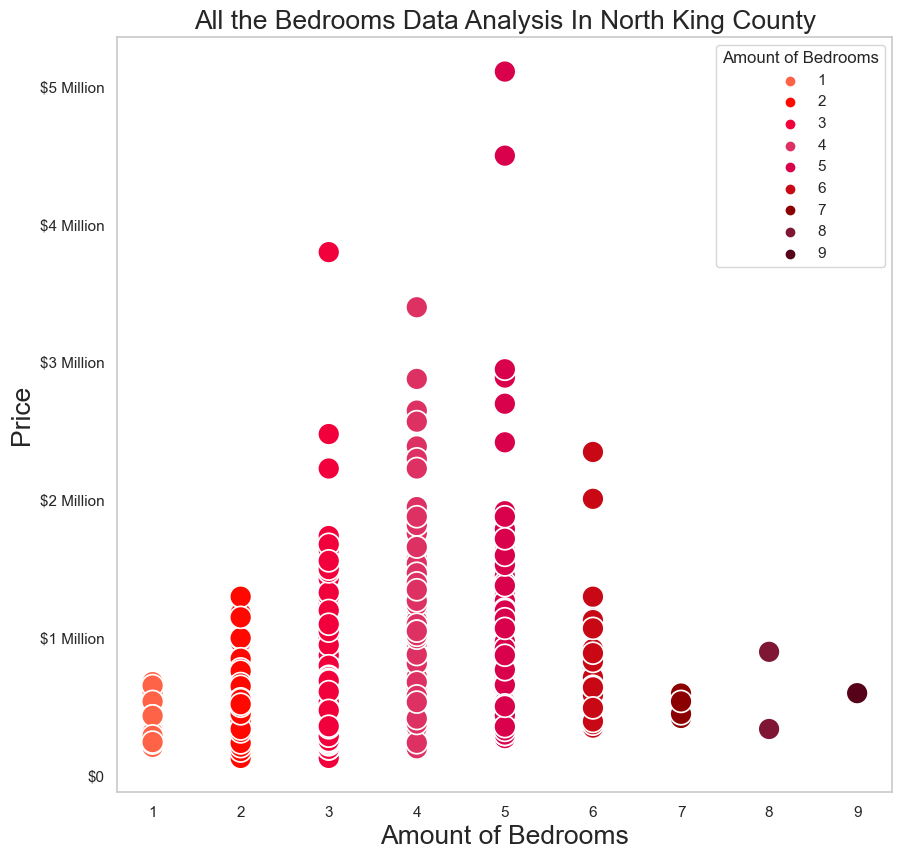

In [14]:
x = regressiondata1['Amount_of_Bedrooms']
y = regressiondata1['Price']
sns.set(style='whitegrid')
flatui = ['#FF6347','#FF0800','#f2003c','#DE3163','#d9004c','#c80815','#8b0000','#7f1734','#560319']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata1, x=x, y=y,s=250,hue='Amount_of_Bedrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bedrooms Data Analysis In North King County',size=19)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Bedrooms')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million'])
plt.show()

In [15]:
train_df, test_df = train_test_split(regressiondata1, test_size=0.10, shuffle=False)

In [16]:
X_train, y_train = train_df[['Amount_of_Bedrooms']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Bedrooms']], test_df[['Price']]

In [17]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [18]:
Quantile_regression = pd.DataFrame({'Amount_of_Bedrooms': X_test.reset_index()['Amount_of_Bedrooms'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [19]:
Quantile_regression

Amount_of_Bedrooms            0.1            0.5           0.9     Price
0                     2  272048.942197  423627.002065  6.025586e+05  548000.0
1                     2  272048.942197  423627.002065  6.025586e+05  462550.0
2                     2  272048.942197  423627.002065  6.025586e+05  250000.0
3                     2  272048.942197  423627.002065  6.025586e+05  306000.0
4                     2  272048.942197  423627.002065  6.025586e+05  525000.0
..                  ...            ...            ...           ...       ...
378                   7  394998.140702  604997.184492  1.000995e+06  450000.0
379                   7  394998.140702  604997.184492  1.000995e+06  540000.0
380                   8  394998.140702  604997.184492  1.000995e+06  340000.0
381                   8  394998.140702  604997.184492  1.000995e+06  900000.0
382                   9  394998.140702  604997.184492  1.000995e+06  599999.0

[383 rows x 5 columns]

In [20]:
melted_data = pd.melt(Quantile_regression, id_vars=['Amount_of_Bedrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.drop(range(1149,1532))

In [21]:
melted_data

Amount_of_Bedrooms variable         value
0                      2      0.1  2.720489e+05
1                      2      0.1  2.720489e+05
2                      2      0.1  2.720489e+05
3                      2      0.1  2.720489e+05
4                      2      0.1  2.720489e+05
...                  ...      ...           ...
1144                   7      0.9  1.000995e+06
1145                   7      0.9  1.000995e+06
1146                   8      0.9  1.000995e+06
1147                   8      0.9  1.000995e+06
1148                   9      0.9  1.000995e+06

[1149 rows x 3 columns]

In [22]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Bedrooms':[1,2,3,4,5,6,7,8,9],
    '0.1':[272048.942197,272048.942197,272048.942197,394998.140702,394998.140702,394998.140702,
          394998.140702,394998.140702,394998.140702],
'0.5':[423627.002065,423627.002065,423627.002065,604997.184492,604997.184492,604997.184492,604997.184492,
      604997.184492	,604997.184492],
'0.9':[6.025586e+05,6.025586e+05,6.025586e+05,1.000995e+06,1.000995e+06,1.000995e+06,1.000995e+06,
      1.000995e+06,1.000995e+06]})
Quantileregression_updated

Amount_of_Bedrooms            0.1            0.5        0.9
0                   1  272048.942197  423627.002065   602558.6
1                   2  272048.942197  423627.002065   602558.6
2                   3  272048.942197  423627.002065   602558.6
3                   4  394998.140702  604997.184492  1000995.0
4                   5  394998.140702  604997.184492  1000995.0
5                   6  394998.140702  604997.184492  1000995.0
6                   7  394998.140702  604997.184492  1000995.0
7                   8  394998.140702  604997.184492  1000995.0
8                   9  394998.140702  604997.184492  1000995.0

In [23]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Bedrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

Amount_of_Bedrooms Percentile         value
0                    1        0.1  2.720489e+05
1                    2        0.1  2.720489e+05
2                    3        0.1  2.720489e+05
3                    4        0.1  3.949981e+05
4                    5        0.1  3.949981e+05
5                    6        0.1  3.949981e+05
6                    7        0.1  3.949981e+05
7                    8        0.1  3.949981e+05
8                    9        0.1  3.949981e+05
9                    1        0.5  4.236270e+05
10                   2        0.5  4.236270e+05
11                   3        0.5  4.236270e+05
12                   4        0.5  6.049972e+05
13                   5        0.5  6.049972e+05
14                   6        0.5  6.049972e+05
15                   7        0.5  6.049972e+05
16                   8        0.5  6.049972e+05
17                   9        0.5  6.049972e+05
18                   1        0.9  6.025586e+05
19                   2        0.9  6.025586e+05
20                   3        0.9  6.025586e+05
21                   4        0.9  1.000995e+06
22                   5        0.9  1.000995e+06
23                   6        0.9  1.000995e+06
24                   7        0.9  1.000995e+06
25                   8        0.9  1.000995e+06
26                   9        0.9  1.000995e+06

<ipython-input-24-812472b4c17c>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000', '$800,000',


[Text(0, 200000.0, '0'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '$900,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1100000.0, '')]

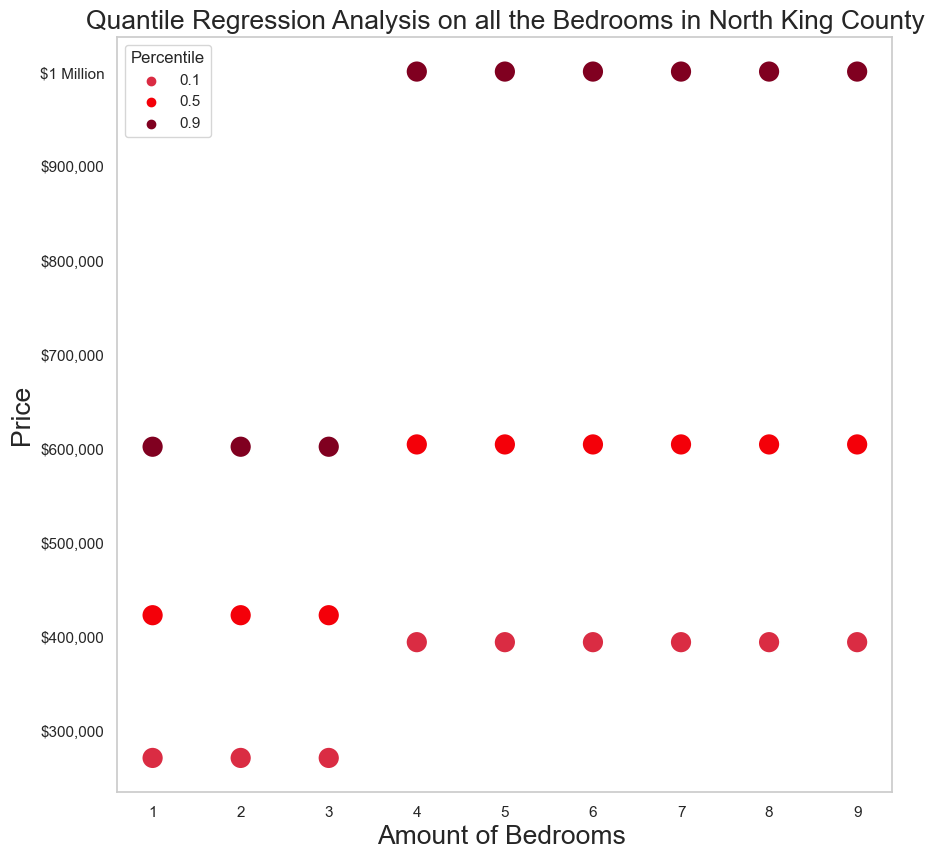

In [24]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#DA2C43","#F40009","#800020"]
ax = sns.scatterplot(data=melted_data, x="Amount_of_Bedrooms", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
plt.gcf().set_size_inches((10,10))
ax.set_title('Quantile Regression Analysis on all the Bedrooms in North King County',size=19)
plt.xlabel("Amount of Bedrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000', '$800,000',
                 '$900,000','$1 Million'])

<ipython-input-25-2afeaeea88c2>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000', '$800,000',


[Text(0, 200000.0, '0'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '$900,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1100000.0, '')]

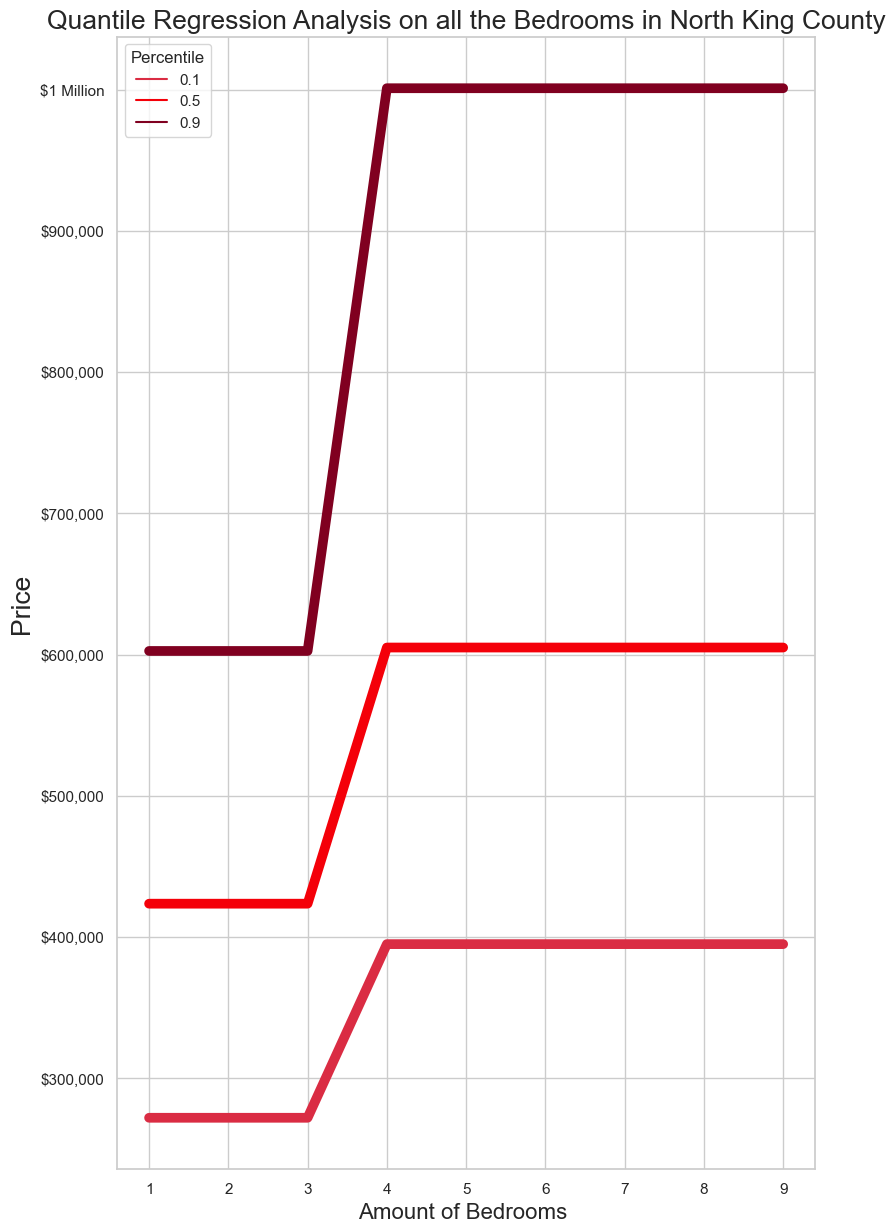

In [25]:
sns.set_style("whitegrid")
flatui = ["#DA2C43","#F40009","#800020"]
ax=sns.lineplot( data=melted_data, x="Amount_of_Bedrooms",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Bedrooms in North King County',size=19)
plt.xlabel("Amount of Bedrooms ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000', '$800,000',
                 '$900,000','$1 Million'])

In [26]:
(Quantile_regression['Price'] > Quantile_regression['0.1']).value_counts()

True     348
False     35
dtype: int64

In [27]:
i = 0
y= 0
x = []
while i < 348:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 35:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

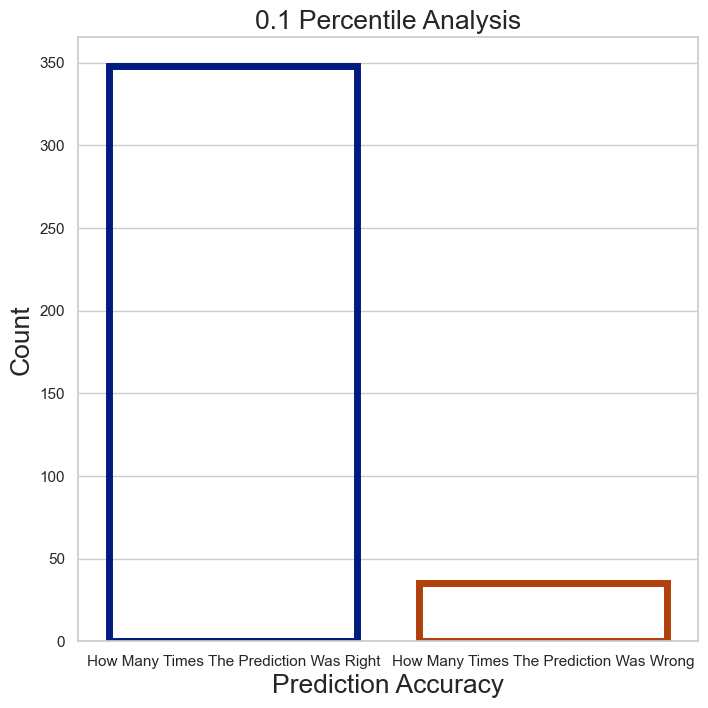

In [28]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [29]:
(Quantile_regression['Price'] > Quantile_regression['0.5']).value_counts()

True     213
False    170
dtype: int64

In [30]:
i = 0
y= 0
x = []
while i < 213:
    x.append('How Many Times The Predictionwas Was Right')
    i+=1
while y < 170:
    x.append('How Many Times The Predictionwas Was Wrong')
    y+=1
len(x)
df32 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

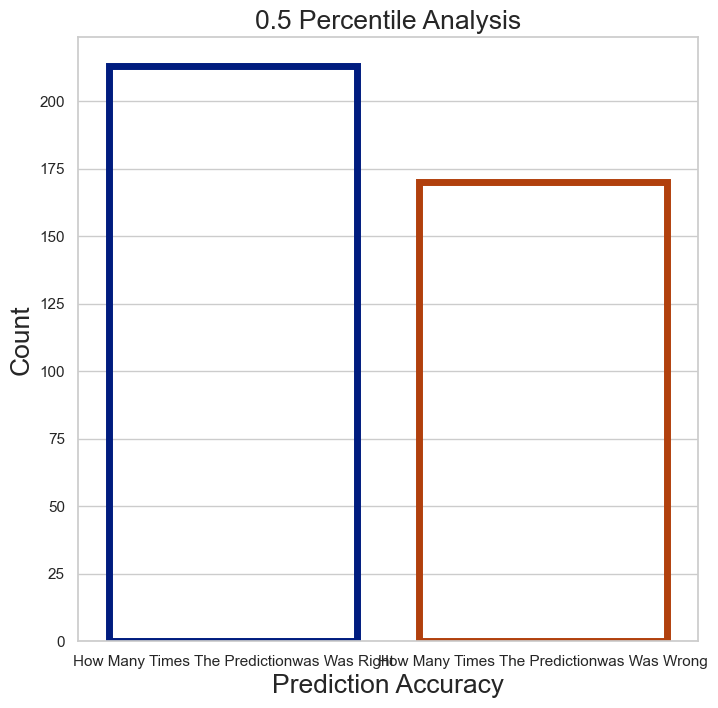

In [31]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df32,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [32]:
(Quantile_regression['Price'] > Quantile_regression['0.9']).value_counts()

False    315
True      68
dtype: int64

In [33]:
i = 0
y= 0
x = []
while i < 315:
    x.append('How Many Times The Predictionwas Was Right')
    i+=1
while y < 68:
    x.append('How Many Times The Predictionwas Was Wrong')
    y+=1
len(x)
df33 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

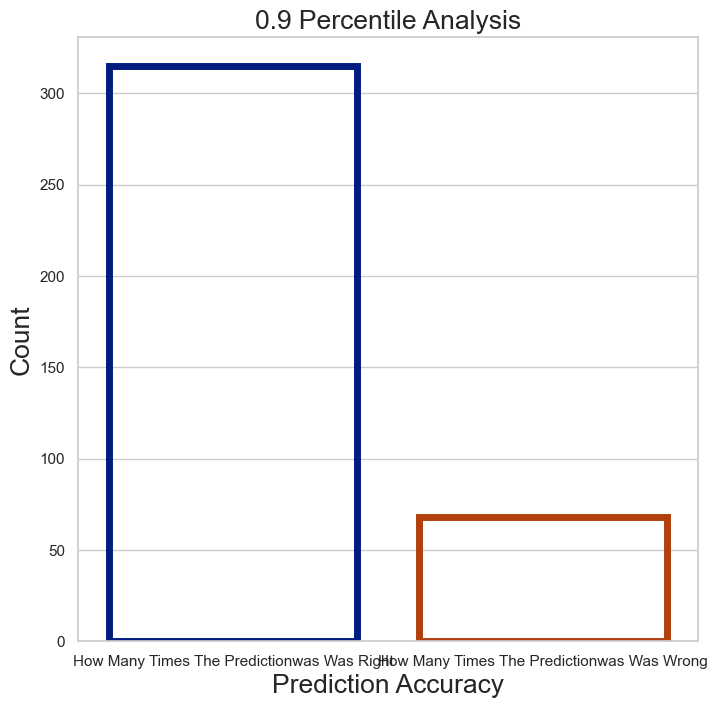

In [34]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df33,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [35]:
Predictions = []
for i in regressiondata1.Amount_of_Bedrooms:
    if i == 1:Predictions.append('Between: $272,048 - $602,558')
    if i == 2: Predictions.append('Between: $272,048 - $602,558')
    if i == 3:Predictions.append('Between: $272,048 - $602,558')
    if i == 4:Predictions.append('Between: $394,998 - $1,000,995') 
    if i == 5:Predictions.append('Between: $394,998 - $1,000,995')
    if i == 6:Predictions.append('Between: $394,998 - $1,000,995')
    if i == 7:Predictions.append('Between: $394,998 - $1,000,995')
    if i == 8:Predictions.append('Between: $394,998 - $1,000,995')
    if i == 9:Predictions.append('Between: $394,998 - $1,000,995')
len(Predictions)

3830

In [36]:
price = []
for i in regressiondata1.Price:
    price.append("${:,.0f}".format(i))

In [37]:
Prediction = pd.DataFrame({'Amount of Bedrooms':regressiondata1.Amount_of_Bedrooms,
                           'Prediction':Predictions,'Actual Price':price})
Prediction

Amount of Bedrooms                      Prediction Actual Price
0                      3    Between: $272,048 - $602,558     $310,000
1                      3    Between: $272,048 - $602,558     $438,000
2                      3    Between: $272,048 - $602,558     $696,000
3                      3    Between: $272,048 - $602,558     $450,000
4                      3    Between: $272,048 - $602,558     $549,000
...                  ...                             ...          ...
3825                   7  Between: $394,998 - $1,000,995     $450,000
3826                   7  Between: $394,998 - $1,000,995     $540,000
3827                   8  Between: $394,998 - $1,000,995     $340,000
3828                   8  Between: $394,998 - $1,000,995     $900,000
3829                   9  Between: $394,998 - $1,000,995     $599,999

[3830 rows x 3 columns]

In [38]:
def AMOUNT_BATHROOMS(AMOUNT_BATHROOM):
    locations = house_info['Location'].tolist()

    amount_bed = house_info["Bathrooms"].tolist()
    X_value = []
    bathroom_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)

    for i in bathroom_index:
        if locations[i] == 98133 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98155 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98177 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98115 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98107 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98133 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98033 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98133 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98103 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98072: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98028 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98072 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98077 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98155 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98133 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98077 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98177 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98072 : X_value.append(AMOUNT_BATHROOM)
    return X_value
no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
amount_bathrooms_northking = []
for i in no_of_bathrooms:
    amount_bathrooms_northking.append(AMOUNT_BATHROOMS(i))
amount_bathrooms_northking= sum(amount_bathrooms_northking, [])
len(amount_bathrooms_northking)

3831

In [39]:
def PRICE_BATHROOM(AMOUNT_BATHROOM):
    
    locations = house_info['Location'].tolist()

    amount_bath = house_info["Bathrooms"].tolist()

    bathroom_index = []
    for i,x in enumerate(amount_bath):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)
    len(bathroom_index)

    bathroom_northking = []
    for i in bathroom_index:
        if locations[i] ==   98133 : bathroom_northking.append(i)
        elif locations[i] == 98155 : bathroom_northking.append(i)
        elif locations[i] == 98177 : bathroom_northking.append(i)
        elif locations[i] == 98115 : bathroom_northking.append(i)
        elif locations[i] == 98107 : bathroom_northking.append(i)
        elif locations[i] == 98133 : bathroom_northking.append(i)
        elif locations[i] == 98033 : bathroom_northking.append(i)
        elif locations[i] == 98133 : bathroom_northking.append(i)
        elif locations[i] == 98103: bathroom_northking.append(i)
        elif locations[i] == 98072 : bathroom_northking.append(i)
        elif locations[i] == 98028 : bathroom_northking.append(i)
        elif locations[i] == 98072 : bathroom_northking.append(i)
        elif locations[i] == 98077 : bathroom_northking.append(i)
        elif locations[i] == 98155 : bathroom_northking.append(i)
        elif locations[i] == 98133 : bathroom_northking.append(i)
        elif locations[i] == 98077 : bathroom_northking.append(i)
        elif locations[i] == 98177 : bathroom_northking.append(i)
        elif locations[i] == 98072 : bathroom_northking.append(i)
    price = house_info["Price"].tolist()

    price_northking = []
    for i in bathroom_northking:price_northking.append(price[i])
    return(price_northking)

no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
price_bathroom_northking = []
for i in no_of_bathrooms:
    price_bathroom_northking.append(PRICE_BATHROOM(i))
price_bathroom_northking = sum(price_bathroom_northking, [])
price_bathroom_northking

[696000.0,
 680000.0,
 660000.0,
 921500.0,
 917500.0,
 400000.0,
 274975.0,
 604950.0,
 632925.0,
 1000000.0,
 551000.0,
 496500.0,
 1200000.0,
 750000.0,
 880000.0,
 530000.0,
 340000.0,
 650000.0,
 475000.0,
 435000.0,
 449950.0,
 760000.0,
 480000.0,
 660000.0,
 800000.0,
 990000.0,
 720000.0,
 630000.0,
 535000.0,
 585000.0,
 1130000.0,
 510000.0,
 425000.0,
 565000.0,
 392400.0,
 365000.0,
 340000.0,
 748000.0,
 847000.0,
 537250.0,
 605000.0,
 1080000.0,
 503000.0,
 519900.0,
 706000.0,
 1180000.0,
 495000.0,
 1100000.0,
 828500.0,
 550000.0,
 467000.0,
 576000.0,
 825000.0,
 520500.0,
 442500.0,
 535000.0,
 805000.0,
 883000.0,
 480000.0,
 824500.0,
 439500.0,
 475000.0,
 830000.0,
 475000.0,
 670950.0,
 765000.0,
 760000.0,
 426000.0,
 509950.0,
 775000.0,
 522250.0,
 665000.0,
 446500.0,
 459000.0,
 625000.0,
 355950.0,
 409900.0,
 674250.0,
 543000.0,
 475000.0,
 552500.0,
 715000.0,
 420000.0,
 980000.0,
 687000.0,
 779000.0,
 579000.0,
 549950.0,
 503000.0,
 685000.0,
 353

In [40]:
regressiondata2 = pd.DataFrame({'Amount_of_Bathrooms':amount_bathrooms_northking,
                                'Price':price_bathroom_northking})
regressiondata2.Amount_of_Bathrooms.value_counts()
#regressiondata2

1.00    861
2.50    721
1.75    569
2.25    362
2.00    358
1.50    316
2.75    188
3.00    144
3.25    108
3.50    102
3.75     31
4.00     23
4.50     15
4.25     11
0.75      9
4.75      5
5.00      2
5.75      2
6.25      1
5.50      1
5.25      1
0.50      1
Name: Amount_of_Bathrooms, dtype: int64

<ipython-input-41-132c62a4c0b1>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','0','$1 Million','$2 Million','$3 Million','$4 Million',


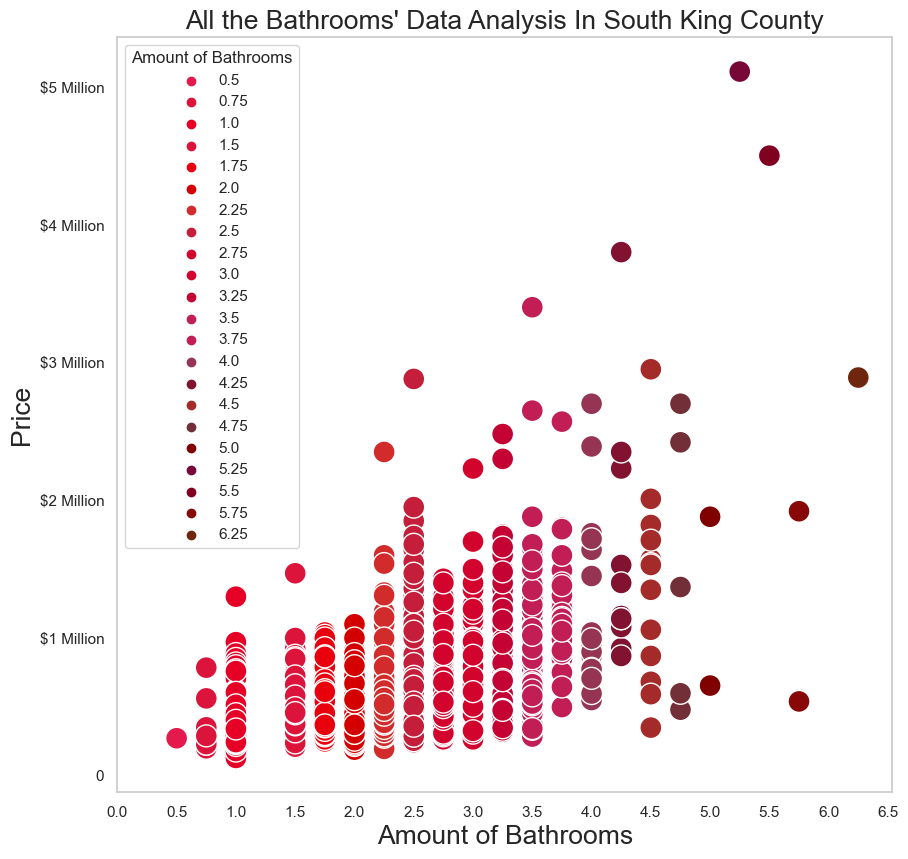

In [41]:
x = regressiondata2['Amount_of_Bathrooms']
y = regressiondata2['Price']
flatui = ['#e51a4c','#dc143c','#e60026','#DC143C','#e8000d',
          '#d40000','#D22B2B','#C41E3A','#D2042D','#D2042D',
          '#c40233','#C21E56','#C21E56','#953553','#811331','#A52A2A',
          '#722F37','#800000', '#770737','#800020',
          '#880808','#6E260E']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata2, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Bathrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bathrooms\' Data Analysis In South King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.legend(title='Amount of Bathrooms')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','0','$1 Million','$2 Million','$3 Million','$4 Million',
                         '$5 Million'])
plt.xticks(np.arange(0,7,0.5))
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()

plt.show()

In [42]:
train_df, test_df = train_test_split(regressiondata2, test_size=0.10, shuffle=False)

In [43]:
X_train, y_train = train_df[['Amount_of_Bathrooms']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Bathrooms']], test_df[['Price']]

In [44]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [45]:
Quantile_regression1 = pd.DataFrame({'Amount_of_Bathrooms': X_test.reset_index()['Amount_of_Bathrooms'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [46]:
Quantile_regression1

Amount_of_Bathrooms            0.1            0.5            0.9  \
0                   3.00  398997.993200  669448.442874  969994.910420   
1                   3.00  398997.993200  669448.442874  969994.910420   
2                   3.00  398997.993200  669448.442874  969994.910420   
3                   3.00  398997.993200  669448.442874  969994.910420   
4                   3.00  398997.993200  669448.442874  969994.910420   
..                   ...            ...            ...            ...   
379                 5.50  398997.993200  669448.442874  969994.910420   
380                 5.75  398997.993200  669448.442874  969994.910420   
381                 5.75  398997.993200  669448.442874  969994.910420   
382                 0.50  275001.195263  395002.390526  594904.895153   
383                 6.25  398997.993200  669448.442874  969994.910420   

         Price  
0     910000.0  
1     605000.0  
2     546000.0  
3     570000.0  
4     869000.0  
..         ...  
379  4500000.0  
380   540000.0  
381  1920000.0  
382   273000.0  
383  2890000.0  

[384 rows x 5 columns]

In [47]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Bathrooms':[0.50,0.25,0.75,1.0,1.25,1.5,1.75,2.0,
                                                                  2.5,2.25,2.75,3.0,3.25,3.5,3.75,4.0,
                                                                  4.25,4.5,4.75,5.0,5.25,5.5,5.75,
                                                                  6.0,6.25],
    '0.1':[275001.195263,275001.195263,275001.195263,275001.195263,275001.195263,275001.195263,
           275001.195263,275001.195263,275001.195263,275001.195263,275001.195263,
          398997.993200,398997.993200,398997.993200,398997.993200,398997.993200,398997.993200,
          398997.993200,398997.993200,398997.993200,398997.993200,398997.993200,398997.993200,
          398997.993200,398997.993200],
 '0.5':[395002.390526,395002.390526,395002.390526,395002.390526,395002.390526,395002.390526,
          395002.390526,395002.390526,395002.390526,395002.390526,395002.390526,
    669448.442874,669448.442874,669448.442874,669448.442874,669448.442874,669448.442874,669448.442874,
    669448.442874,669448.442874,669448.442874,669448.442874,669448.442874,669448.442874,669448.442874 ],
   '0.9':[594904.895153,594904.895153,594904.895153,594904.895153,594904.895153,594904.895153,
         594904.895153,594904.895153,594904.895153,594904.895153,594904.895153,
969994.910420,969994.910420,969994.910420,969994.910420,969994.910420,969994.910420,969994.910420,
 969994.910420,969994.910420,969994.910420,969994.910420,969994.910420,969994.910420,
          969994.910420 ]})
Quantileregression_updated

Amount_of_Bathrooms            0.1            0.5            0.9
0                  0.50  275001.195263  395002.390526  594904.895153
1                  0.25  275001.195263  395002.390526  594904.895153
2                  0.75  275001.195263  395002.390526  594904.895153
3                  1.00  275001.195263  395002.390526  594904.895153
4                  1.25  275001.195263  395002.390526  594904.895153
5                  1.50  275001.195263  395002.390526  594904.895153
6                  1.75  275001.195263  395002.390526  594904.895153
7                  2.00  275001.195263  395002.390526  594904.895153
8                  2.50  275001.195263  395002.390526  594904.895153
9                  2.25  275001.195263  395002.390526  594904.895153
10                 2.75  275001.195263  395002.390526  594904.895153
11                 3.00  398997.993200  669448.442874  969994.910420
12                 3.25  398997.993200  669448.442874  969994.910420
13                 3.50  398997.993200  669448.442874  969994.910420
14                 3.75  398997.993200  669448.442874  969994.910420
15                 4.00  398997.993200  669448.442874  969994.910420
16                 4.25  398997.993200  669448.442874  969994.910420
17                 4.50  398997.993200  669448.442874  969994.910420
18                 4.75  398997.993200  669448.442874  969994.910420
19                 5.00  398997.993200  669448.442874  969994.910420
20                 5.25  398997.993200  669448.442874  969994.910420
21                 5.50  398997.993200  669448.442874  969994.910420
22                 5.75  398997.993200  669448.442874  969994.910420
23                 6.00  398997.993200  669448.442874  969994.910420
24                 6.25  398997.993200  669448.442874  969994.910420

In [48]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Bathrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

Amount_of_Bathrooms Percentile          value
0                  0.50        0.1  275001.195263
1                  0.25        0.1  275001.195263
2                  0.75        0.1  275001.195263
3                  1.00        0.1  275001.195263
4                  1.25        0.1  275001.195263
..                  ...        ...            ...
70                 5.25        0.9  969994.910420
71                 5.50        0.9  969994.910420
72                 5.75        0.9  969994.910420
73                 6.00        0.9  969994.910420
74                 6.25        0.9  969994.910420

[75 rows x 3 columns]

<ipython-input-49-b36e6d3820db>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000',


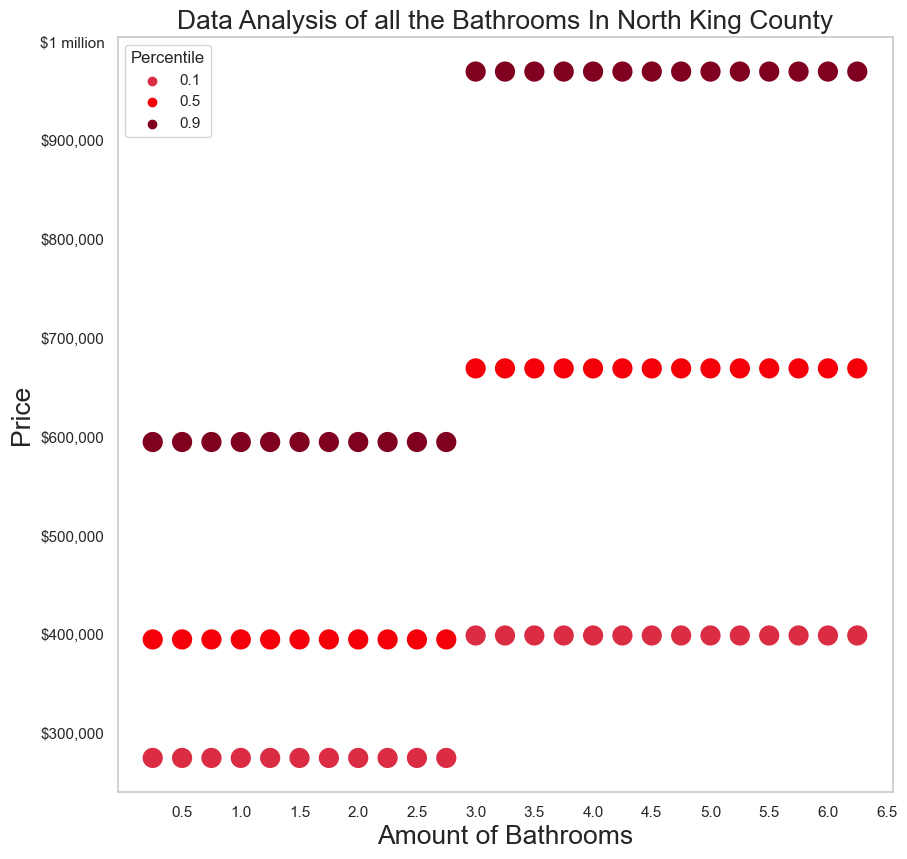

In [49]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#DA2C43","#F40009","#800020"]
ax =sns.scatterplot(data=melted_data, x="Amount_of_Bathrooms",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.xticks(np.arange(0.5,7,0.5))       
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Bathrooms In North King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000',
                   '$700,000', '$800,000','$900,000','$1 million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Bathrooms")
plt.gcf().set_size_inches((10,10))

<ipython-input-50-ce37a17354ec>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000',


[Text(0, 200000.0, '0'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '$900,000'),
 Text(0, 1000000.0, '$1 million'),
 Text(0, 1100000.0, '')]

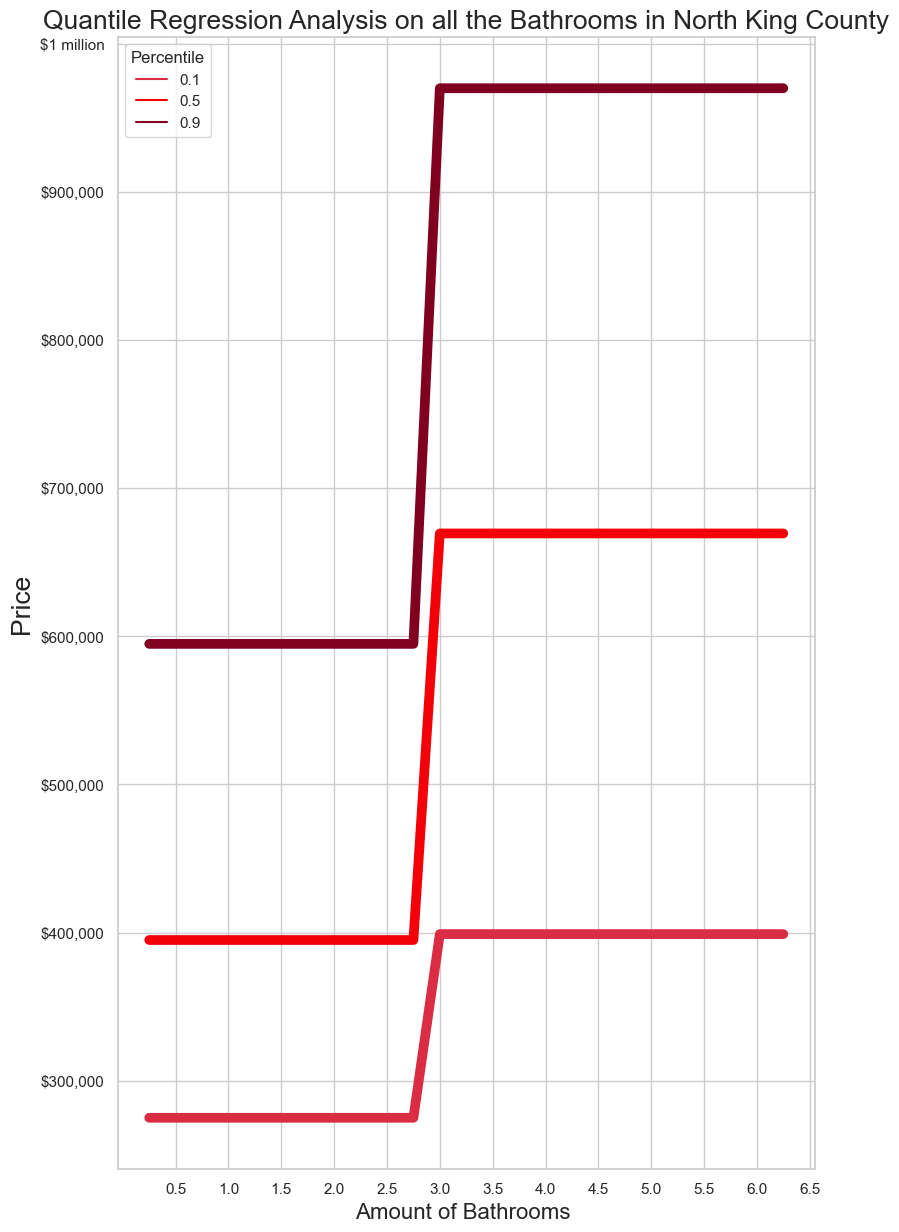

In [50]:
sns.set_style("whitegrid")
flatui = ["#DA2C43","#F40009","#800020"]
ax=sns.lineplot( data=melted_data, x="Amount_of_Bathrooms",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.xticks(np.arange(0.5,7,0.5))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Bathrooms in North King County',size=19)
plt.xlabel("Amount of Bathrooms ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000',
                   '$700,000', '$800,000','$900,000','$1 million'])

In [51]:
(Quantile_regression1['Price'] > Quantile_regression1['0.1']).value_counts()

True     359
False     25
dtype: int64

In [52]:
i = 0
y= 0
x = []
while i < 359:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 25:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

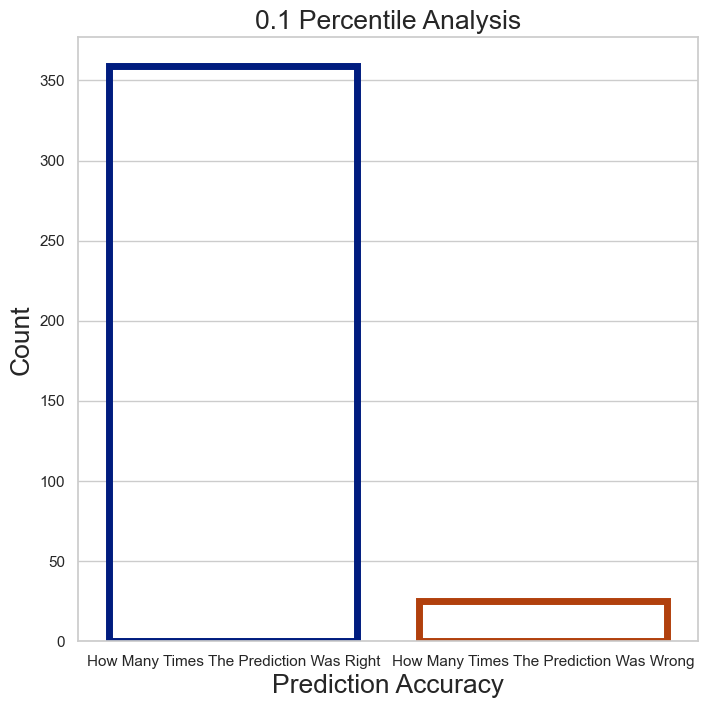

In [53]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [54]:
(Quantile_regression1['Price'] > Quantile_regression1['0.5']).value_counts()

True     248
False    136
dtype: int64

In [55]:
i = 0
y= 0
x = []
while i < 248:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 136:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

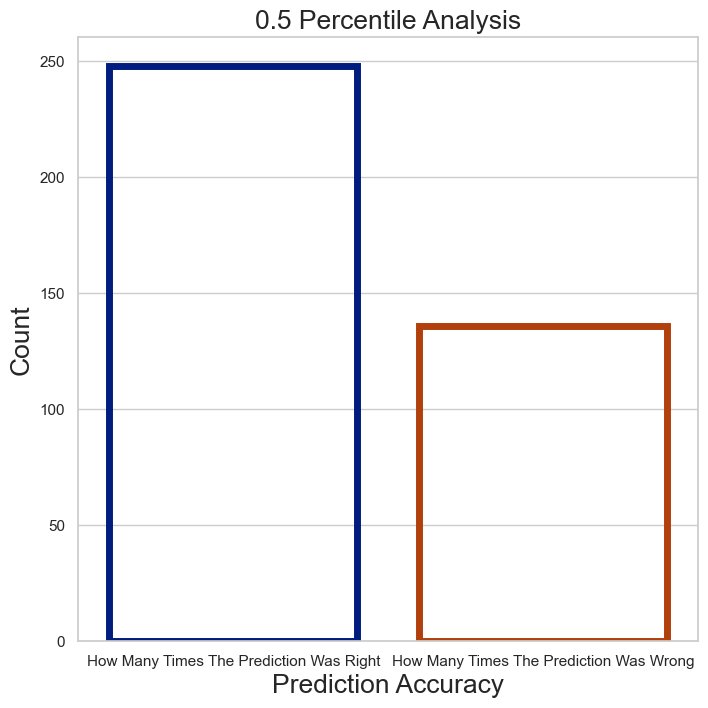

In [56]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [57]:
(Quantile_regression1['Price'] > Quantile_regression1['0.9']).value_counts()

False    239
True     145
dtype: int64

In [58]:
i = 0
y= 0
x = []
while i < 239:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 145:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

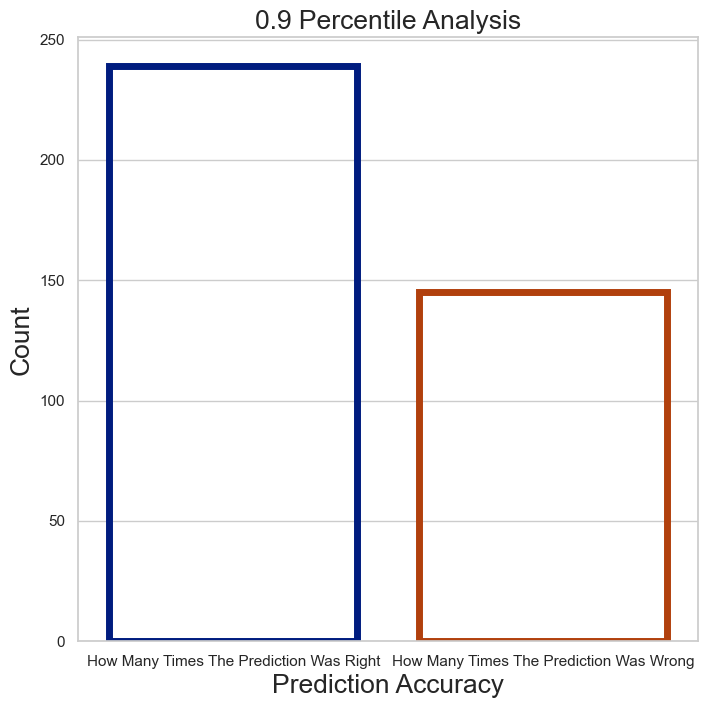

In [59]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [60]:
Predictions1 = []
for i in regressiondata2.Amount_of_Bathrooms:
    if i == 0.5:Predictions1.append('Between: $275,001 - $594,904')
    if i == 0.25:Predictions1.append('Between: $275,001 - $594,904')
    if i == 0.75: Predictions1.append('Between: $275,001 - $594,904')
    if i == 1.0:Predictions1.append('Between: $275,001 - $594,904')
    if i == 1.25:Predictions1.append('Between: $275,001 - $594,904')
    if i == 1.5:Predictions1.append('Between: $275,001 - $594,904') 
    if i == 1.75:Predictions1.append('Between: $275,001 - $594,904')
    if i == 2.0:Predictions1.append('Between: $275,001 - $594,904')
    if i == 2.25:Predictions1.append('Between: $275,001 - $594,904')
    if i == 2.5:Predictions1.append('Between: $275,001 - $594,904') 
    if i == 2.75:Predictions1.append('Between: $275,001 - $594,904')
    if i == 3.0: Predictions1.append('Between: $398,997 - $969,994')
    if i == 3.25:Predictions1.append('Between: $398,997 - $969,994')
    if i == 3.5:Predictions1.append('Between: $398,997 - $969,994') 
    if i == 3.75:Predictions1.append('Between: $398,997 - $969,994')
    if i == 4.0:Predictions1.append('Between: $398,997 - $969,994')
    if i == 4.25:Predictions1.append('Between: $398,997 - $969,994')
    if i == 4.5:Predictions1.append('Between: $398,997 - $969,994')
    if i == 4.75: Predictions1.append('Between: $398,997 - $969,994')
    if i == 5.0:Predictions1.append('Between: $398,997 - $969,994')
    if i == 5.25:Predictions1.append('Between: $398,997 - $969,994') 
    if i == 5.5:Predictions1.append('Between: $398,997 - $969,994') 
    if i == 5.75:Predictions1.append('Between: $398,997 - $969,994') 
    if i == 6.0:Predictions1.append('Between: $398,997 - $969,994')
    if i == 6.25:Predictions1.append('Between: $398,997 - $969,994') 
len(Predictions1)

3831

In [61]:
price = []
for i in regressiondata2.Price:
    price.append("${:,.0f}".format(i))
len(price)

3831

In [62]:
Prediction1 = pd.DataFrame({'Amount of Bathrooms':regressiondata2.Amount_of_Bathrooms,
                           'Prediction':Predictions1,'Actual Price':price})
Prediction1

Amount of Bathrooms                    Prediction Actual Price
0                    2.50  Between: $275,001 - $594,904     $696,000
1                    2.50  Between: $275,001 - $594,904     $680,000
2                    2.50  Between: $275,001 - $594,904     $660,000
3                    2.50  Between: $275,001 - $594,904     $921,500
4                    2.50  Between: $275,001 - $594,904     $917,500
...                   ...                           ...          ...
3826                 5.50  Between: $398,997 - $969,994   $4,500,000
3827                 5.75  Between: $398,997 - $969,994     $540,000
3828                 5.75  Between: $398,997 - $969,994   $1,920,000
3829                 0.50  Between: $275,001 - $594,904     $273,000
3830                 6.25  Between: $398,997 - $969,994   $2,890,000

[3831 rows x 3 columns]

In [63]:
def PRICE_FLOORS(AMOUNT_FLOORS):
    
    locations = house_info['Location'].tolist()

    amount_floors = house_info['Floors'].tolist()

    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)
    len(floors_index)

    floors_northking = []
    for i in floors_index:
        if locations[i] == 98133 : floors_northking.append(i)
        elif locations[i] == 98155 : floors_northking.append(i)
        elif locations[i] == 98177 : floors_northking.append(i)
        elif locations[i] == 98115 : floors_northking.append(i)
        elif locations[i] == 98107 : floors_northking.append(i)
        elif locations[i] == 98133 : floors_northking.append(i)
        elif locations[i] == 98033 : floors_northking.append(i)
        elif locations[i] == 98133 : floors_northking.append(i)
        elif locations[i] == 98103 : floors_northking.append(i)
        elif locations[i] == 98072 : floors_northking.append(i)
        elif locations[i] == 98028 : floors_northking.append(i)
        elif locations[i] == 98072 : floors_northking.append(i)
        elif locations[i] == 98077 : floors_northking.append(i)
        elif locations[i] == 98155 : floors_northking.append(i)
        elif locations[i] == 98133 : floors_northking.append(i)
        elif locations[i] == 98077 : floors_northking.append(i)
        elif locations[i] == 98177 : floors_northking.append(i)
        elif locations[i] == 98072 : floors_northking.append(i)

    price = house_info["Price"].tolist()

    price_northking = []
    for i in floors_northking:price_northking.append(price[i])
    return(price_northking)

no_of_floors = house_info["Floors"].value_counts().index.tolist()
price_floors_northking = []
for i in no_of_floors:
    price_floors_northking.append(PRICE_FLOORS(i))
price_floors_northking = sum(price_floors_northking, [])
len(price_floors_northking)

3831

In [64]:
def AMOUNT_FLOORS(AMOUNT_FLOORS):
    locations = house_info['Location'].tolist()

    amount_floors = house_info["Floors"].tolist()
    X_value = []
    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)

    for i in floors_index:
        if locations[i] == 98133 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98155 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98177 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98115 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98107 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98133 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98033 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98133 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98103 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98072: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98028 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98072 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98077 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98155 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98133 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98077 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98177 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98072 : X_value.append(AMOUNT_FLOORS)
    return X_value
no_of_floors = house_info["Floors"].value_counts().index.tolist()
amount_floors_northking = []
for i in no_of_floors:
    amount_floors_northking.append(AMOUNT_FLOORS(i))
amount_floors_northking= sum(amount_floors_northking, [])
len(amount_floors_northking)

3831

In [65]:
regressiondata3 = pd.DataFrame({'Amount_of_Floors':amount_floors_northking,
                                'Price':price_floors_northking})
#regressiondata3.Amount_of_Floors.value_counts()
regressiondata3

Amount_of_Floors     Price
0                  1.0  180000.0
1                  1.0  468000.0
2                  1.0  385000.0
3                  1.0  438000.0
4                  1.0  450000.0
...                ...       ...
3826               2.5  255000.0
3827               3.5  435000.0
3828               3.5  525000.0
3829               3.5  525000.0
3830               3.5  563500.0

[3831 rows x 2 columns]

<ipython-input-66-74b34516385b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','0','$1 Million','$2 Million','$3 Million','$4 Million',


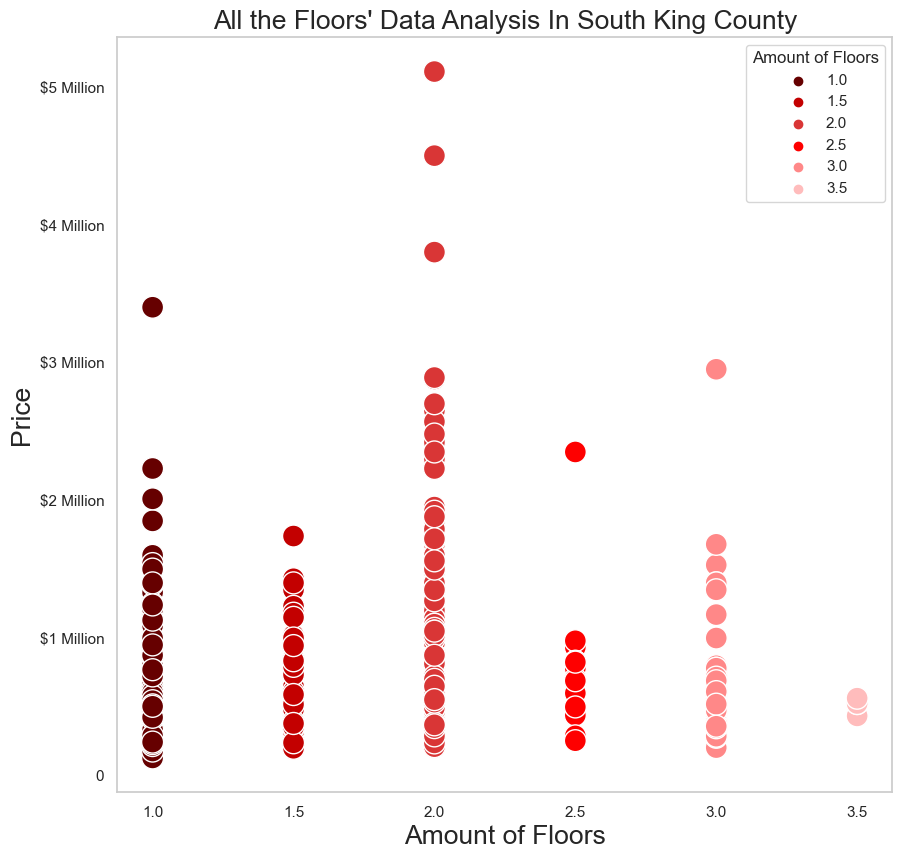

In [66]:
x = regressiondata3['Amount_of_Floors']
y = regressiondata3['Price']
flatui = ['#660000','#C30000','#D93636','#FE0000','#FF8888','#FFBCBC']
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata3, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Floors', palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Floors\' Data Analysis In South King County',size=19)
plt.xlabel("Amount of Floors", size=19)
plt.legend(title='Amount of Floors')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','0','$1 Million','$2 Million','$3 Million','$4 Million',
                         '$5 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [67]:
train_df, test_df = train_test_split(regressiondata3, test_size=0.10, shuffle=False)

In [68]:
X_train, y_train = train_df[['Amount_of_Floors']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Floors']], test_df[['Price']]

In [69]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [70]:
Quantile_regression2 = pd.DataFrame({'Amount_of_Floors': X_test.reset_index()['Amount_of_Floors'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [71]:
Quantile_regression2

Amount_of_Floors            0.1            0.5           0.9     Price
0                 1.5  349984.336974  565998.406316  8.268012e+05  805000.0
1                 1.5  349984.336974  565998.406316  8.268012e+05  325000.0
2                 1.5  349984.336974  565998.406316  8.268012e+05  401000.0
3                 1.5  349984.336974  565998.406316  8.268012e+05  531000.0
4                 1.5  349984.336974  565998.406316  8.268012e+05  425000.0
..                ...            ...            ...           ...       ...
379               2.5  401998.076839  634996.573580  1.149993e+06  255000.0
380               3.5  401998.076839  634996.573580  1.149993e+06  435000.0
381               3.5  401998.076839  634996.573580  1.149993e+06  525000.0
382               3.5  401998.076839  634996.573580  1.149993e+06  525000.0
383               3.5  401998.076839  634996.573580  1.149993e+06  563500.0

[384 rows x 5 columns]

In [72]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Floors':[1.0,1.5,2.0,2.5,3.0,3.5],
    '0.1':[349984.336974,349984.336974,349984.336974,401998.076839,401998.076839,401998.076839],
'0.5':[565998.406316,565998.406316,565998.406316,634996.573580,634996.573580,634996.573580],
'0.9':[8.268012e+05,8.268012e+05,8.268012e+05,1.149993e+06,1.149993e+06,1.149993e+06]})
Quantileregression_updated

Amount_of_Floors            0.1            0.5        0.9
0               1.0  349984.336974  565998.406316   826801.2
1               1.5  349984.336974  565998.406316   826801.2
2               2.0  349984.336974  565998.406316   826801.2
3               2.5  401998.076839  634996.573580  1149993.0
4               3.0  401998.076839  634996.573580  1149993.0
5               3.5  401998.076839  634996.573580  1149993.0

In [73]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Floors'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

Amount_of_Floors Percentile         value
0                1.0        0.1  3.499843e+05
1                1.5        0.1  3.499843e+05
2                2.0        0.1  3.499843e+05
3                2.5        0.1  4.019981e+05
4                3.0        0.1  4.019981e+05
5                3.5        0.1  4.019981e+05
6                1.0        0.5  5.659984e+05
7                1.5        0.5  5.659984e+05
8                2.0        0.5  5.659984e+05
9                2.5        0.5  6.349966e+05
10               3.0        0.5  6.349966e+05
11               3.5        0.5  6.349966e+05
12               1.0        0.9  8.268012e+05
13               1.5        0.9  8.268012e+05
14               2.0        0.9  8.268012e+05
15               2.5        0.9  1.149993e+06
16               3.0        0.9  1.149993e+06
17               3.5        0.9  1.149993e+06

<ipython-input-74-278a638b7205>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000',


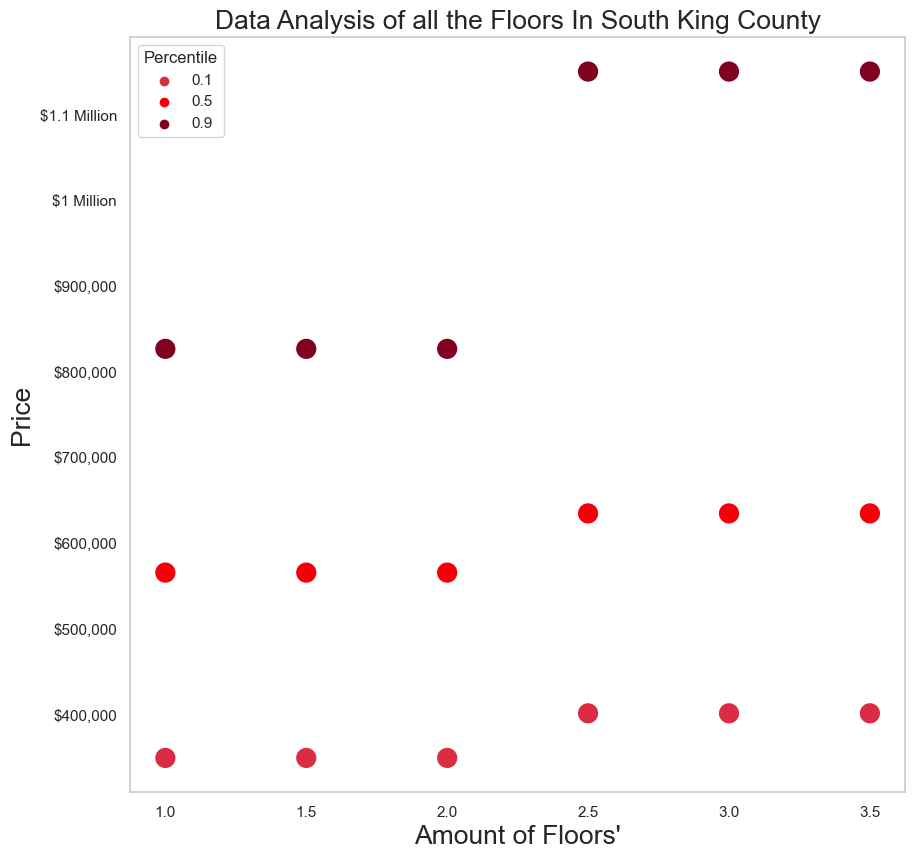

In [74]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#DA2C43","#F40009","#800020"]
ax =sns.scatterplot(data=melted_data, x="Amount_of_Floors",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Floors In South King County',size=19)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000',
                    '$1 Million','$1.1 Million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Floors'")
plt.gcf().set_size_inches((10,10))

<ipython-input-75-cba544ff7a00>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000',


[Text(0, 300000.0, '0'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '$900,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1100000.0, '$1.1 Million'),
 Text(0, 1200000.0, '')]

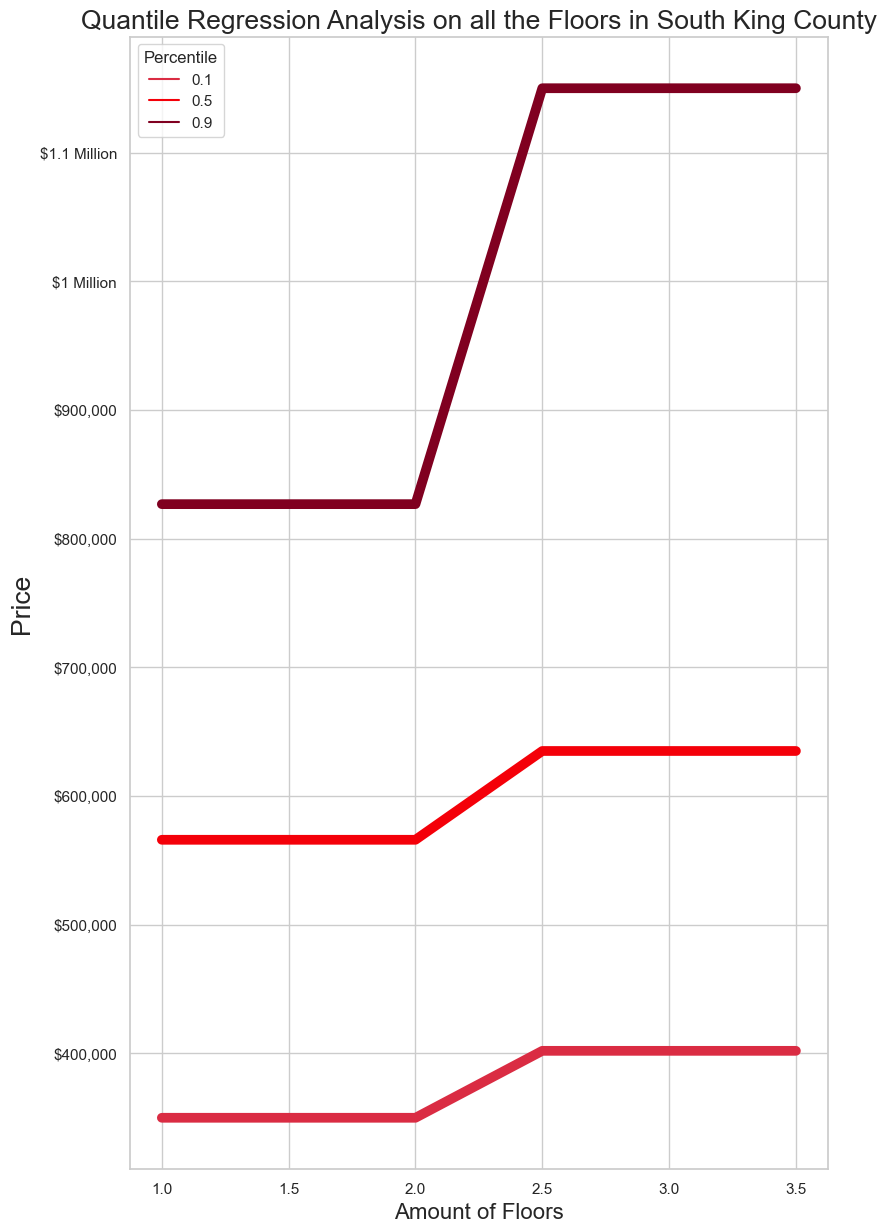

In [75]:
sns.set_style("whitegrid")
flatui = ["#DA2C43","#F40009","#800020"]
ax=sns.lineplot( data=melted_data, x="Amount_of_Floors",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Floors in South King County',size=19)
plt.xlabel("Amount of Floors", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000',
                    '$1 Million','$1.1 Million'])

In [76]:
(Quantile_regression2['Price'] > Quantile_regression2['0.1']).value_counts()

True     269
False    115
dtype: int64

In [77]:
i = 0
y= 0
x = []
while i < 269:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 115:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

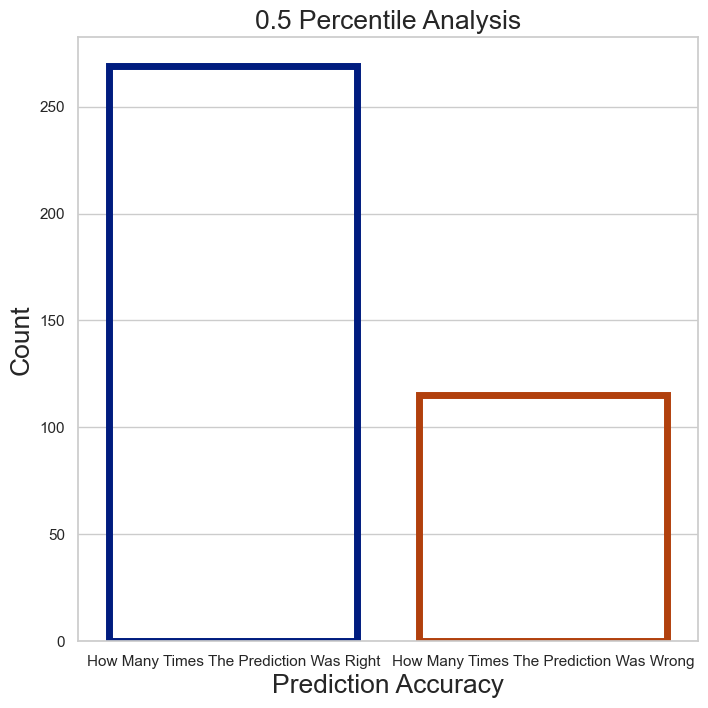

In [78]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [79]:
(Quantile_regression2['Price'] > Quantile_regression2['0.5']).value_counts()

False    306
True      78
dtype: int64

In [80]:
i = 0
y= 0
x = []
while i < 306:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 78:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

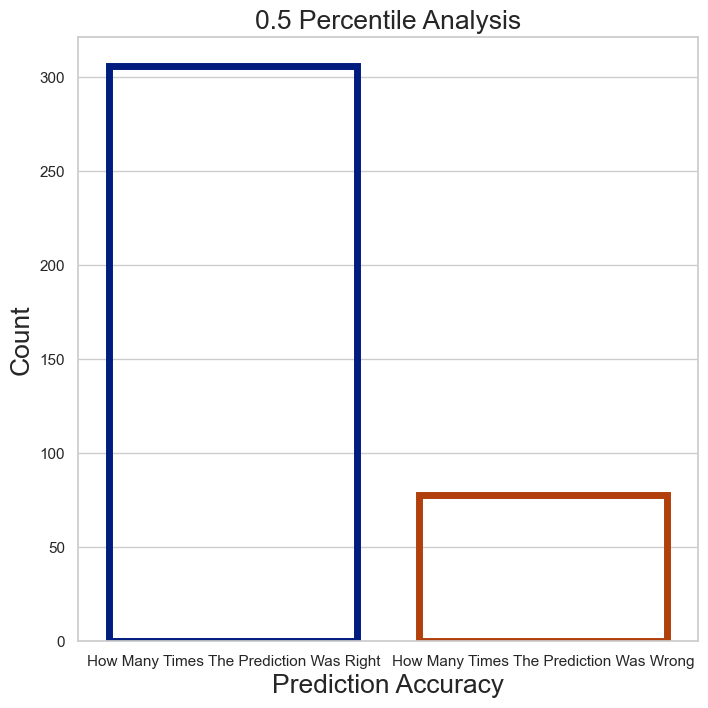

In [81]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [82]:
(Quantile_regression2['Price'] > Quantile_regression2['0.9']).value_counts()

False    369
True      15
dtype: int64

In [83]:
i = 0
y= 0
x = []
while i < 369:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 15:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

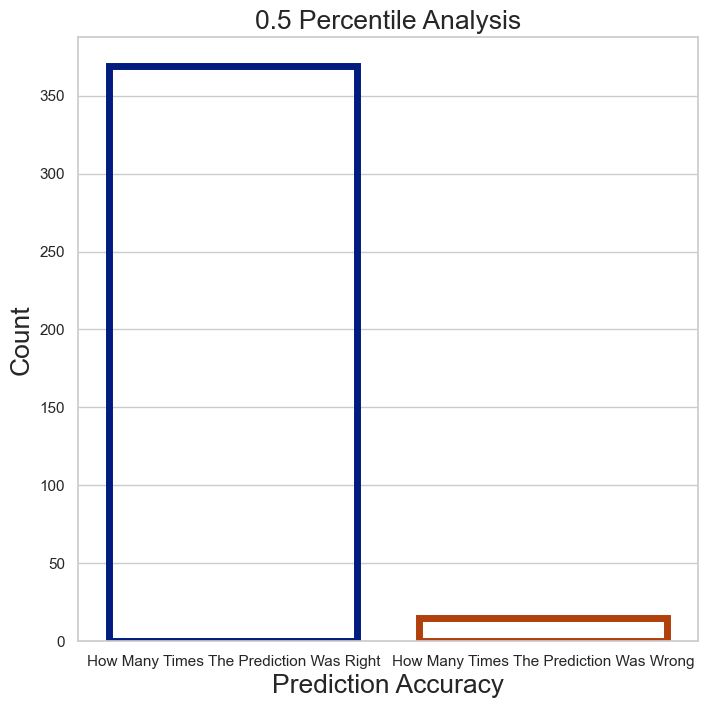

In [84]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [85]:
Predictions2 = []
for i in regressiondata3.Amount_of_Floors:
    if i == 1.0:Predictions2.append('Between: $349,984 - $826,801') 
    if i == 1.5:Predictions2.append('Between: $349,984 - $826,801') 
    if i == 2.0:Predictions2.append('Between: $349,984 - $826,801')
    if i == 2.5:Predictions2.append('Between: $401,998 - $1,149,993') 
    if i == 3.0: Predictions2.append('Between: $401,998 - $1,149,993')
    if i == 3.5: Predictions2.append('Between: $401,998 - $1,149,993')
len(Predictions2)

3831

In [86]:
price = []
for i in regressiondata3.Price:
    price.append("${:,.0f}".format(i))

In [87]:
Prediction2 = pd.DataFrame({'Amount of Floors':regressiondata3.Amount_of_Floors,
                           'Prediction':Predictions2,'Actual Price':price})
Prediction2

Amount of Floors                      Prediction Actual Price
0                  1.0    Between: $349,984 - $826,801     $180,000
1                  1.0    Between: $349,984 - $826,801     $468,000
2                  1.0    Between: $349,984 - $826,801     $385,000
3                  1.0    Between: $349,984 - $826,801     $438,000
4                  1.0    Between: $349,984 - $826,801     $450,000
...                ...                             ...          ...
3826               2.5  Between: $401,998 - $1,149,993     $255,000
3827               3.5  Between: $401,998 - $1,149,993     $435,000
3828               3.5  Between: $401,998 - $1,149,993     $525,000
3829               3.5  Between: $401,998 - $1,149,993     $525,000
3830               3.5  Between: $401,998 - $1,149,993     $563,500

[3831 rows x 3 columns]

In [88]:
def PRICE_YEARS_BUILT(YEAR_BUILT):
    
    locations = house_info['Location'].tolist()

    year_built = house_info['Year Built'].tolist()

    years_built_index = []
    for i,x in enumerate(year_built):
        if x == YEAR_BUILT:years_built_index.append(i)

    years_built_northking = []
    for i in years_built_index:
        if locations[i] == 98133 : years_built_northking.append(i)
        elif locations[i] == 98155 : years_built_northking.append(i)
        elif locations[i] == 98177 : years_built_northking.append(i)
        elif locations[i] == 98115 : years_built_northking.append(i)
        elif locations[i] == 98107 : years_built_northking.append(i)
        elif locations[i] == 98133 : years_built_northking.append(i)
        elif locations[i] == 98033 : years_built_northking.append(i)
        elif locations[i] == 98133 : years_built_northking.append(i)
        elif locations[i] == 98103 : years_built_northking.append(i)
        elif locations[i] == 98072 : years_built_northking.append(i)
        elif locations[i] == 98028 : years_built_northking.append(i)
        elif locations[i] == 98072 : years_built_northking.append(i)
        elif locations[i] == 98077 : years_built_northking.append(i)
        elif locations[i] == 98155 : years_built_northking.append(i)
        elif locations[i] == 98133 : years_built_northking.append(i)
        elif locations[i] == 98077 : years_built_northking.append(i)
        elif locations[i] == 98177 : years_built_northking.append(i)
        elif locations[i] == 98072 : years_built_northking.append(i)

    price = house_info["Price"].tolist()

    price_northking = []
    for i in years_built_northking:price_northking.append(price[i])
    return(price_northking)

no_of_Year = house_info["Year Built"].value_counts().index.tolist()
price_Year_northking = []
for i in no_of_Year:
    price_Year_northking.append(PRICE_YEARS_BUILT(i))
price_Year_northking = sum(price_Year_northking, [])
len(price_Year_northking)

3831

In [89]:
def AMOUNT_YEARS_BUILT(AMOUNT_YEARS):
    locations = house_info['Location'].tolist()

    years_built = house_info["Year Built"].tolist()
    X_value = []
    years_index = []
    for i,x in enumerate(years_built):
        if x == AMOUNT_YEARS:years_index.append(i)

    for i in years_index:
        if locations[i] == 98133 :   X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98155 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98177 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98115 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98107 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98133 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98033 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98133 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98103 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98072:  X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98028 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98072 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98077 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98155 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98133 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98077 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98177 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98072 : X_value.append(AMOUNT_YEARS)

    return X_value
no_of_years = house_info["Year Built"].value_counts().index.tolist()
amount_years_northking = []
for i in no_of_years:
    amount_years_northking.append(AMOUNT_YEARS_BUILT(i))
amount_years_northking= sum(amount_years_northking, [])
len(amount_years_northking)

3831

In [90]:
regressiondata4 = pd.DataFrame({'Year_Built':amount_years_northking,
                                'Price':price_Year_northking})
regressiondata4

Year_Built      Price
0           2014   549000.0
1           2014   519950.0
2           2014   770000.0
3           2014   880000.0
4           2014  1130000.0
...          ...        ...
3826        1934   550000.0
3827        1934   345950.0
3828        1934   338000.0
3829        1934   395000.0
3830        1934   550000.0

[3831 rows x 2 columns]

In [91]:
year = regressiondata4['Year_Built'].value_counts()
year

2008    94
1947    91
2007    88
1950    85
1948    84
        ..
1901     6
1934     5
1933     4
1902     4
1936     4
Name: Year_Built, Length: 116, dtype: int64

In [92]:
reg1,year1 = [],[]
for i,x in enumerate(amount_years_northking):
    if x == 1900:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1901:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1902:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1903:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1904:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1905:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1906:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1907:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1908:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1909:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1910:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1911:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1912:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1913:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1914:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1915:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1916:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1917:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1918:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1919:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1920:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1921:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1922:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1923:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1924:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1925:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1926:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1927:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1928:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1929:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1930:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1931:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1932:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1933:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if i == 1934:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1935:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1936:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1937:
        reg1.append(price_Year_northking[i])
        year1.append(x)
reg1.remove(579000.0)
year1.remove(1961) 

In [93]:
regressiondata44 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
#for i,x in enumerate(regressiondata44.Year_Built):print(i,x,reg1[i])
x= regressiondata44.Year_Built.value_counts()
len(x)

37

In [94]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_northking):
    if x == 1938:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1939:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1940:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1941:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1942:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1943:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1944:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1945:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1946:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1947:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1948:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1949:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1950:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1951:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1952:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1953:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1954:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1955:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1956:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1957:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1958:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1959:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1960:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1961:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1962:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1963:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1964:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1965:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1966:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1967:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1968:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1969:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1970:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1971:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if i == 1972:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1973:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1974:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1975:
        reg1.append(price_Year_northking[i])
        year1.append(x)

In [95]:
regressiondata45 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata45

Year_Built      Price
0           1968   452000.0
1           1968   400000.0
2           1968   605000.0
3           1968   389000.0
4           1968   442500.0
...          ...        ...
1584        1938   404500.0
1585        1938   397500.0
1586        1938   495000.0
1587        1938   580000.0
1588        1938  1800000.0

[1589 rows x 2 columns]

In [96]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_northking):
    if x == 1976:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1977:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1978:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1979:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1980:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1981:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1982:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1983:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1984:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1985:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1986:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1987:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1988:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1989:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1990:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1991:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1992:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1993:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1994:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1995:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1996:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1997:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1998:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1999:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2001:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2002:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2003:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2004:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2005:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2006:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2007:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2008:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2009:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2010:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if i == 2011:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2012:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2013:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2014:
        reg1.append(price_Year_northking[i])
        year1.append(x)
reg1.remove(326100.0)
year1.remove(1942) 

In [97]:
regressiondata46 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata46
x= regressiondata46.Year_Built.value_counts()
len(x)
#for i,x in enumerate(regressiondata46.Year_Built):if x == 1942:print(i,x,reg1[i])

37

In [98]:
flatui1 = ['#F1895F','#EA926F','#F18356','#F47644','#E26E40',
           '#E18762','#E88259','#DF7449','#D86B3F','#F94C07',
          '#F04B09','#E54809','#E2541B','#D3521F','#EB5B21',
           
          '#EEA88C','#F2B59D','#EBB9A5','#EEC7B7','#F4D0C1',
           '#F1D7CC','#F1E6E1','#F7EEEB','#F1C8B7','#DFB09E',
        
           '#C04514','#B24F27','#973D19','#863211','#7D2907',
           '#723219','#714431','#5C3B2D','#50392F','#3C251C','#4A372F','#2E211C']

In [99]:
flatui2 = ['#FC0606','#E80303','#DA1818','#E43030','#D23030',
           '#BC3434','#A92E2E','#9A2222','#8A1414','#B71A1A',
          '#B32323','#BE1212','#E86060','#DD4C4C','#E33A3A',
           
          '#F5DEDE','#F1E3E3','#F9E6E6','#F9EEEE','#F6E0E0',
           '#F9DBDB','#EACDCD','#9D2121','#961818','#8A0000',
        
           '#840303','#7E0E0E','#721212','#600F0F','#571414',
           '#470F0F','#431818','#3B1919','#330E0E','#420808',
           'black','black']

In [100]:
flatui3 = ['#EC3A74','#D13769','#EB3D75','#DB386D','#CC2C60',
           '#D51050','#E9044E','#F70554','#F5135D','#F32A6B',
          '#F03974','#EE5385','#F36B97','#F27FA4','#EC8DAC',
           
          '#F5C2D3', '#EFC9D7', '#F1D0DC','#F7EEF2', '#F1ECEE','#EFDEE4',
          '#EFDEE4','#ECA5BE','#F0B8CC',   '#7E0531'  ,'#850835','#721335',
        
           '#6C203C','#82032C','#680726','#6C1833','#870731',
           '#6B0A29','#6C1934','#702F44','#701D38','#730F30']

<ipython-input-101-0dd67d56e3c0>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
<ipython-input-101-0dd67d56e3c0>:17: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)
<ipython-input-101-0dd67d56e3c0>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million',
<ipython-input-101-0dd67d56e3c0>:37: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)
<ipython-input-101-0dd67d56e3c0>:54: UserWarning: FixedFormatter should only be used together with Fixed

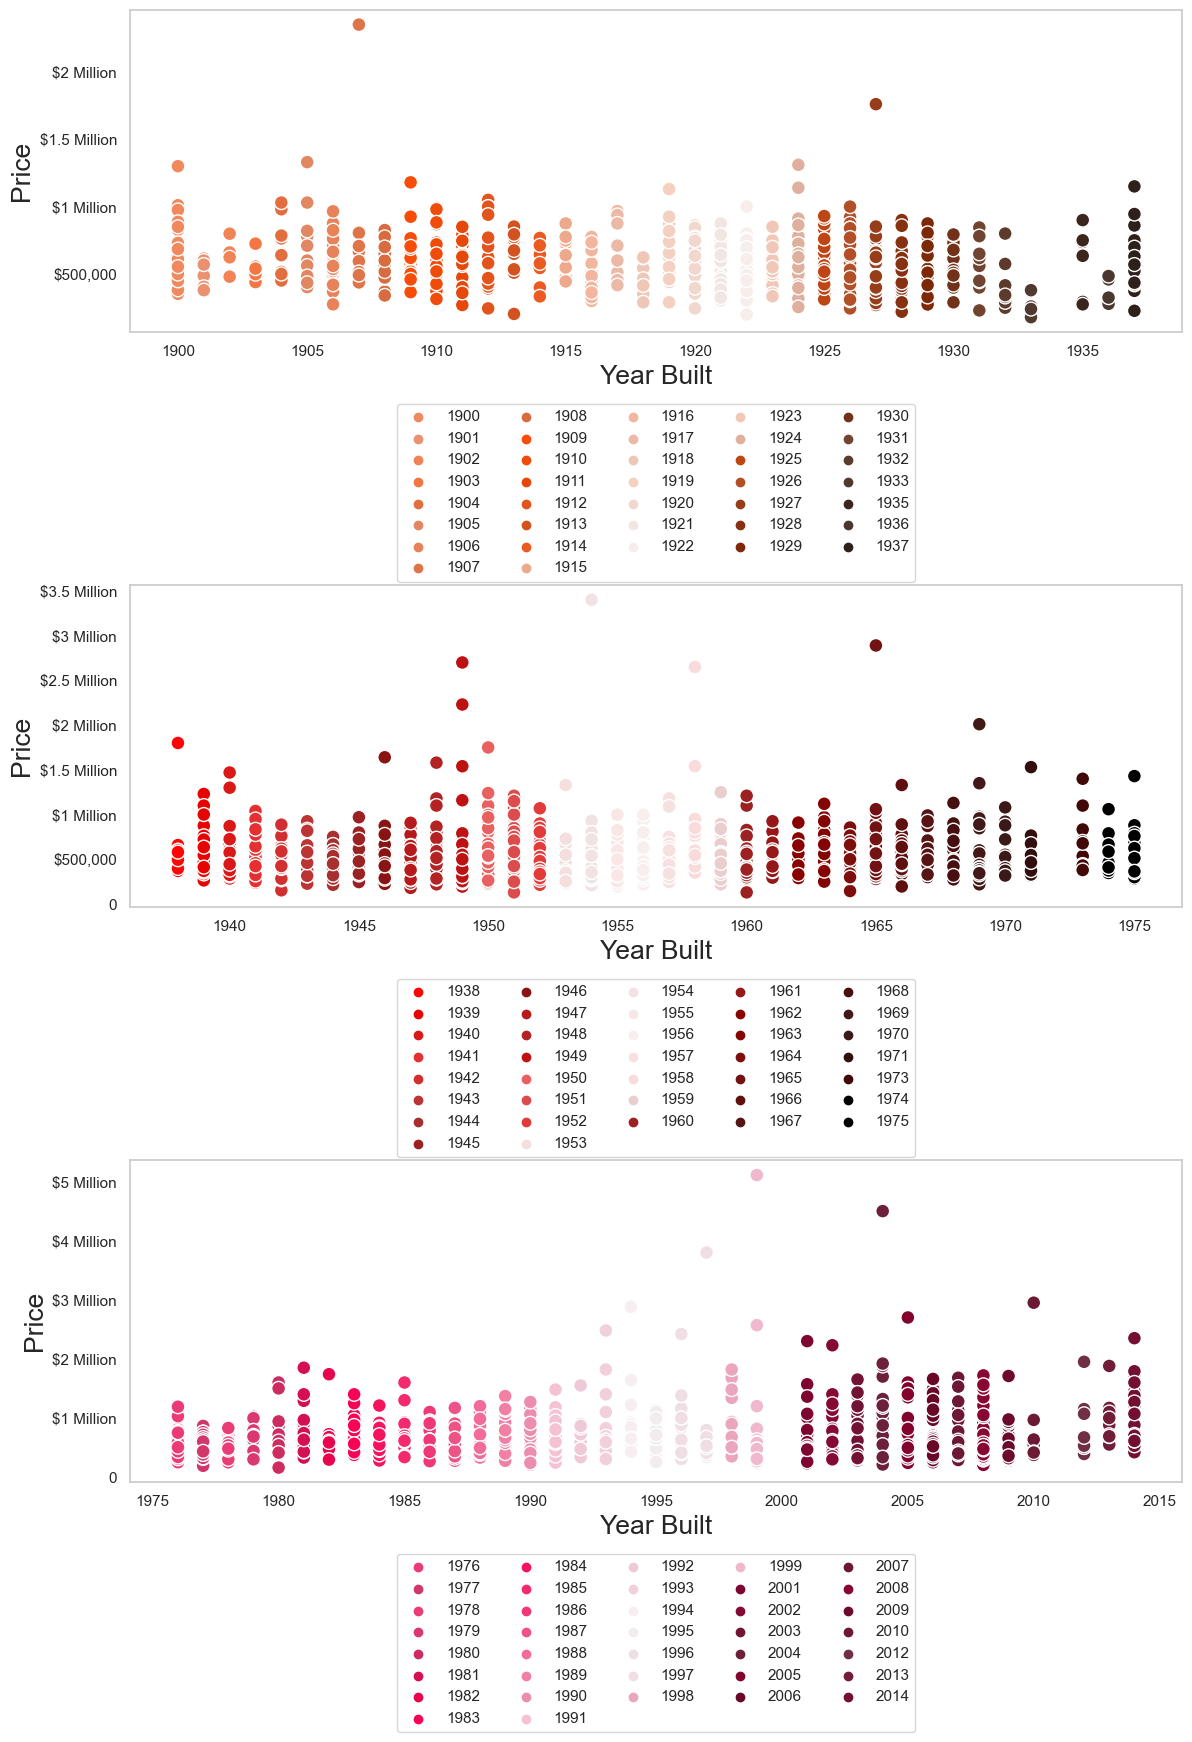

In [101]:
plt.subplot(3,1,1) #35 years in tottal
x = regressiondata44['Year_Built']
y = regressiondata44['Price']
data=regressiondata44
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata44, x=x, y=y,s=100, linewidth = 1, hue='Year_Built'
                    ,palette=flatui1)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In North King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
plt.tight_layout(1)

#xticks=ax.xaxis.get_major_ticks()

plt.subplot(3,1,2)
x = regressiondata45['Year_Built']
y = regressiondata45['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata45, x=x, y=y,s=100, linewidth = 1, hue='Year_Built'
                    ,palette=flatui2)
plt.grid(linestyle='-', linewidth=0.2)

plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million',
                    '$3 Million','$3.5 Million',])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
plt.tight_layout(1)

#xticks=ax.xaxis.get_major_ticks(1930,1995)
#plt.xticks(np.arange(1930,1995)) 

plt.subplot(3,1,3)
sns.set(style="whitegrid")
x = regressiondata46['Year_Built']
y = regressiondata46['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata46, x=x, y=y,s=100, linewidth = 1, hue='Year_Built',
                    palette=flatui3)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In South King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
#plt.tight_layout(1)
plt.show()



In [102]:
train_df, test_df = train_test_split(regressiondata4, test_size=0.90, shuffle=False)

In [103]:
X_train, y_train = train_df[['Year_Built']], train_df[['Price']]
X_test, y_test = test_df[['Year_Built']], test_df[['Price']]

In [104]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [105]:
Quantile_regression3 = pd.DataFrame({'Year_Built': X_test.reset_index()['Year_Built'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [106]:
Quantile_regression3

Year_Built            0.1            0.5           0.9     Price
0           2007  346000.129133  500001.062456  8.719086e+05  356000.0
1           2007  346000.129133  500001.062456  8.719086e+05  379950.0
2           2007  346000.129133  500001.062456  8.719086e+05  515000.0
3           2007  346000.129133  500001.062456  8.719086e+05  963000.0
4           2007  346000.129133  500001.062456  8.719086e+05  770000.0
...          ...            ...            ...           ...       ...
3443        1934  347000.087313  522500.464824  1.158001e+06  550000.0
3444        1934  347000.087313  522500.464824  1.158001e+06  345950.0
3445        1934  347000.087313  522500.464824  1.158001e+06  338000.0
3446        1934  347000.087313  522500.464824  1.158001e+06  395000.0
3447        1934  347000.087313  522500.464824  1.158001e+06  550000.0

[3448 rows x 5 columns]

In [107]:
melted_data = pd.melt(Quantile_regression3, id_vars=['Year_Built'])
melted_data = melted_data.dropna()
melted_data = melted_data.drop(range(10344,13792))
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

Year_Built Percentile         value
0            2007        0.1  3.460001e+05
1            2007        0.1  3.460001e+05
2            2007        0.1  3.460001e+05
3            2007        0.1  3.460001e+05
4            2007        0.1  3.460001e+05
...           ...        ...           ...
10339        1934        0.9  1.158001e+06
10340        1934        0.9  1.158001e+06
10341        1934        0.9  1.158001e+06
10342        1934        0.9  1.158001e+06
10343        1934        0.9  1.158001e+06

[10344 rows x 3 columns]

In [108]:
Quantileregression_updated = pd.DataFrame({'Year_Built':[1900,1901,1902,1903,1904,1905,1906,1907,1908,
                                                         1909,
                                                        1910,1911,1912,1913,1914,1915,1916,1917,1918,
                                                         1919,
                                                        1920,1921,1922,1923,1924,1925,1926,1927,1928,
                                                         1929,
                                                        1930,1931,1932,1933,1934,1935,1935,1936,1937],
'0.1':[347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313],
'0.5':[522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824], 
'0.9':[1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06]})
Quantileregression_updated

Year_Built            0.1            0.5        0.9
0         1900  347000.087313  522500.464824  1158001.0
1         1901  347000.087313  522500.464824  1158001.0
2         1902  347000.087313  522500.464824  1158001.0
3         1903  347000.087313  522500.464824  1158001.0
4         1904  347000.087313  522500.464824  1158001.0
5         1905  347000.087313  522500.464824  1158001.0
6         1906  347000.087313  522500.464824  1158001.0
7         1907  347000.087313  522500.464824  1158001.0
8         1908  347000.087313  522500.464824  1158001.0
9         1909  347000.087313  522500.464824  1158001.0
10        1910  347000.087313  522500.464824  1158001.0
11        1911  347000.087313  522500.464824  1158001.0
12        1912  347000.087313  522500.464824  1158001.0
13        1913  347000.087313  522500.464824  1158001.0
14        1914  347000.087313  522500.464824  1158001.0
15        1915  347000.087313  522500.464824  1158001.0
16        1916  347000.087313  522500.464824  1158001.0
17        1917  347000.087313  522500.464824  1158001.0
18        1918  347000.087313  522500.464824  1158001.0
19        1919  347000.087313  522500.464824  1158001.0
20        1920  347000.087313  522500.464824  1158001.0
21        1921  347000.087313  522500.464824  1158001.0
22        1922  347000.087313  522500.464824  1158001.0
23        1923  347000.087313  522500.464824  1158001.0
24        1924  347000.087313  522500.464824  1158001.0
25        1925  347000.087313  522500.464824  1158001.0
26        1926  347000.087313  522500.464824  1158001.0
27        1927  347000.087313  522500.464824  1158001.0
28        1928  347000.087313  522500.464824  1158001.0
29        1929  347000.087313  522500.464824  1158001.0
30        1930  347000.087313  522500.464824  1158001.0
31        1931  347000.087313  522500.464824  1158001.0
32        1932  347000.087313  522500.464824  1158001.0
33        1933  347000.087313  522500.464824  1158001.0
34        1934  347000.087313  522500.464824  1158001.0
35        1935  347000.087313  522500.464824  1158001.0
36        1935  347000.087313  522500.464824  1158001.0
37        1936  347000.087313  522500.464824  1158001.0
38        1937  347000.087313  522500.464824  1158001.0

In [109]:
melted_data1 = pd.melt(Quantileregression_updated, id_vars=['Year_Built'])
melted_data1 = melted_data1.rename(columns={'variable': 'Percentile'})
melted_data1

Year_Built Percentile         value
0          1900        0.1  3.470001e+05
1          1901        0.1  3.470001e+05
2          1902        0.1  3.470001e+05
3          1903        0.1  3.470001e+05
4          1904        0.1  3.470001e+05
..          ...        ...           ...
112        1934        0.9  1.158001e+06
113        1935        0.9  1.158001e+06
114        1935        0.9  1.158001e+06
115        1936        0.9  1.158001e+06
116        1937        0.9  1.158001e+06

[117 rows x 3 columns]

In [110]:
Quantileregression_updated = pd.DataFrame({'Year_Built':[1938,1939,1940,1941,1942,1943,
                                                        1944,1945,1946,1947,1948,1949,
                                                        1950,1951,1952,1953,1954,1955,
                                                        1956,1957,1958,1959,1960,1961,
                                                        1962,1963,1964,1965,1966,1967,
                                                        1968,1969,1970,1971,1972,1973,
                                                        1974,1975],
'0.1':[347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313],
'0.5':[522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824], 
'0.9':[1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06]})
Quantileregression_updated

Year_Built            0.1            0.5        0.9
0         1938  347000.087313  522500.464824  1158001.0
1         1939  347000.087313  522500.464824  1158001.0
2         1940  347000.087313  522500.464824  1158001.0
3         1941  347000.087313  522500.464824  1158001.0
4         1942  347000.087313  522500.464824  1158001.0
5         1943  347000.087313  522500.464824  1158001.0
6         1944  347000.087313  522500.464824  1158001.0
7         1945  347000.087313  522500.464824  1158001.0
8         1946  347000.087313  522500.464824  1158001.0
9         1947  347000.087313  522500.464824  1158001.0
10        1948  347000.087313  522500.464824  1158001.0
11        1949  347000.087313  522500.464824  1158001.0
12        1950  347000.087313  522500.464824  1158001.0
13        1951  347000.087313  522500.464824  1158001.0
14        1952  347000.087313  522500.464824  1158001.0
15        1953  347000.087313  522500.464824  1158001.0
16        1954  347000.087313  522500.464824  1158001.0
17        1955  347000.087313  522500.464824  1158001.0
18        1956  347000.087313  522500.464824  1158001.0
19        1957  347000.087313  522500.464824  1158001.0
20        1958  347000.087313  522500.464824  1158001.0
21        1959  347000.087313  522500.464824  1158001.0
22        1960  347000.087313  522500.464824  1158001.0
23        1961  347000.087313  522500.464824  1158001.0
24        1962  347000.087313  522500.464824  1158001.0
25        1963  347000.087313  522500.464824  1158001.0
26        1964  347000.087313  522500.464824  1158001.0
27        1965  347000.087313  522500.464824  1158001.0
28        1966  347000.087313  522500.464824  1158001.0
29        1967  347000.087313  522500.464824  1158001.0
30        1968  347000.087313  522500.464824  1158001.0
31        1969  347000.087313  522500.464824  1158001.0
32        1970  347000.087313  522500.464824  1158001.0
33        1971  347000.087313  522500.464824  1158001.0
34        1972  347000.087313  522500.464824  1158001.0
35        1973  347000.087313  522500.464824  1158001.0
36        1974  347000.087313  522500.464824  1158001.0
37        1975  347000.087313  522500.464824  1158001.0

In [111]:
melted_data2 = pd.melt(Quantileregression_updated, id_vars=['Year_Built'])
melted_data2 = melted_data2.rename(columns={'variable': 'Percentile'})
melted_data2

Year_Built Percentile         value
0          1938        0.1  3.470001e+05
1          1939        0.1  3.470001e+05
2          1940        0.1  3.470001e+05
3          1941        0.1  3.470001e+05
4          1942        0.1  3.470001e+05
..          ...        ...           ...
109        1971        0.9  1.158001e+06
110        1972        0.9  1.158001e+06
111        1973        0.9  1.158001e+06
112        1974        0.9  1.158001e+06
113        1975        0.9  1.158001e+06

[114 rows x 3 columns]

In [112]:
Quantileregression_updated = pd.DataFrame({'Year_Built':[1976,1977,1978,1979,1980,1981,
                                                        1982,1983,1984,1985,1986,1987,
                                                        1988,1989,1990,1991,1992,1993,
                                                        1994,1995,1996,1997,1998,1999,
                                                        2000,2001,
                                                         
                                                        2002,2003,2004,2005,2006,2007,
                                                        2008,2009,2010,2011,2012,2013,
                                                        2014,2015],
                                           
'0.1':[347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313, 
      346000.129133,346000.129133,346000.129133,346000.129133,346000.129133,346000.129133,
      346000.129133,346000.129133,346000.129133,346000.129133,346000.129133,346000.129133,
      346000.129133,346000.129133],
                                           
'0.5':[522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,
      500001.062456,500001.062456,500001.062456,500001.062456,500001.062456,500001.062456,
      500001.062456,500001.062456,500001.062456,500001.062456,500001.062456,500001.062456,
      500001.062456,500001.062456], 

'0.9':[1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,
      8.719086e+05,8.719086e+05,8.719086e+05,8.719086e+05,8.719086e+05,8.719086e+05,
      8.719086e+05,8.719086e+05,8.719086e+05,8.719086e+05,8.719086e+05,8.719086e+05,
      8.719086e+05,8.719086e+05
    ]})
Quantileregression_updated

Year_Built            0.1            0.5        0.9
0         1976  347000.087313  522500.464824  1158001.0
1         1977  347000.087313  522500.464824  1158001.0
2         1978  347000.087313  522500.464824  1158001.0
3         1979  347000.087313  522500.464824  1158001.0
4         1980  347000.087313  522500.464824  1158001.0
5         1981  347000.087313  522500.464824  1158001.0
6         1982  347000.087313  522500.464824  1158001.0
7         1983  347000.087313  522500.464824  1158001.0
8         1984  347000.087313  522500.464824  1158001.0
9         1985  347000.087313  522500.464824  1158001.0
10        1986  347000.087313  522500.464824  1158001.0
11        1987  347000.087313  522500.464824  1158001.0
12        1988  347000.087313  522500.464824  1158001.0
13        1989  347000.087313  522500.464824  1158001.0
14        1990  347000.087313  522500.464824  1158001.0
15        1991  347000.087313  522500.464824  1158001.0
16        1992  347000.087313  522500.464824  1158001.0
17        1993  347000.087313  522500.464824  1158001.0
18        1994  347000.087313  522500.464824  1158001.0
19        1995  347000.087313  522500.464824  1158001.0
20        1996  347000.087313  522500.464824  1158001.0
21        1997  347000.087313  522500.464824  1158001.0
22        1998  347000.087313  522500.464824  1158001.0
23        1999  347000.087313  522500.464824  1158001.0
24        2000  347000.087313  522500.464824  1158001.0
25        2001  347000.087313  522500.464824  1158001.0
26        2002  346000.129133  500001.062456   871908.6
27        2003  346000.129133  500001.062456   871908.6
28        2004  346000.129133  500001.062456   871908.6
29        2005  346000.129133  500001.062456   871908.6
30        2006  346000.129133  500001.062456   871908.6
31        2007  346000.129133  500001.062456   871908.6
32        2008  346000.129133  500001.062456   871908.6
33        2009  346000.129133  500001.062456   871908.6
34        2010  346000.129133  500001.062456   871908.6
35        2011  346000.129133  500001.062456   871908.6
36        2012  346000.129133  500001.062456   871908.6
37        2013  346000.129133  500001.062456   871908.6
38        2014  346000.129133  500001.062456   871908.6
39        2015  346000.129133  500001.062456   871908.6

In [113]:
melted_data3 = pd.melt(Quantileregression_updated, id_vars=['Year_Built'])
melted_data3 = melted_data3.rename(columns={'variable': 'Percentile'})
melted_data3

Year_Built Percentile          value
0          1976        0.1  347000.087313
1          1977        0.1  347000.087313
2          1978        0.1  347000.087313
3          1979        0.1  347000.087313
4          1980        0.1  347000.087313
..          ...        ...            ...
115        2011        0.9  871908.600000
116        2012        0.9  871908.600000
117        2013        0.9  871908.600000
118        2014        0.9  871908.600000
119        2015        0.9  871908.600000

[120 rows x 3 columns]

<ipython-input-114-b5d638d2ecac>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
<ipython-input-114-b5d638d2ecac>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
<ipython-input-114-b5d638d2ecac>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',


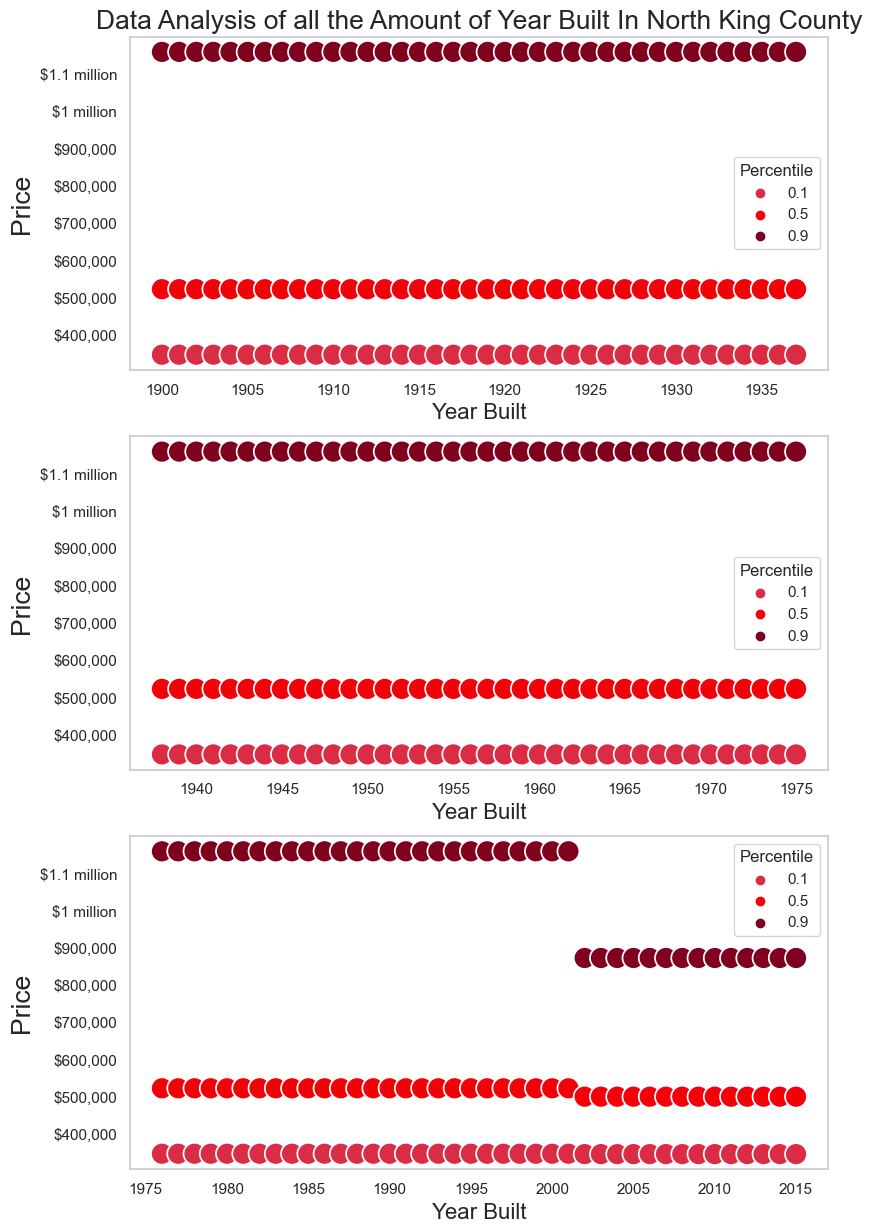

In [114]:
plt.subplot(3,1,1)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#DA2C43","#F40009","#800020"]
ax =sns.scatterplot(data=melted_data1, x="Year_Built",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Amount of Year Built In North King County',size=19)
plt.xlabel("Year Built", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
                    '$1 million','$1.1 million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year Built")
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)


plt.subplot(3,1,2)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#DA2C43","#F40009","#800020"]
ax =sns.scatterplot(data=melted_data2, x="Year_Built",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('Data Analysis of all the Amount of Year Built In South King County',size=19)
plt.xlabel("Year Built", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
                    '$1 million','$1.1 million'])
xlabel = plt.xlabel("Year Built")
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)


plt.subplot(3,1,3)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#DA2C43","#F40009","#800020"]
ax =sns.scatterplot(data=melted_data3, x="Year_Built",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('Data Analysis of all the Amount of Year Built In South King County',size=19)
plt.xlabel("Year Built", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
                    '$1 million','$1.1 million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year Built")
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)

<ipython-input-115-3bedce034a7d>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
<ipython-input-115-3bedce034a7d>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
<ipython-input-115-3bedce034a7d>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',


[Text(0, 300000.0, '0'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '$900,000'),
 Text(0, 1000000.0, '$1 million'),
 Text(0, 1100000.0, '$1.1 million'),
 Text(0, 1200000.0, '')]

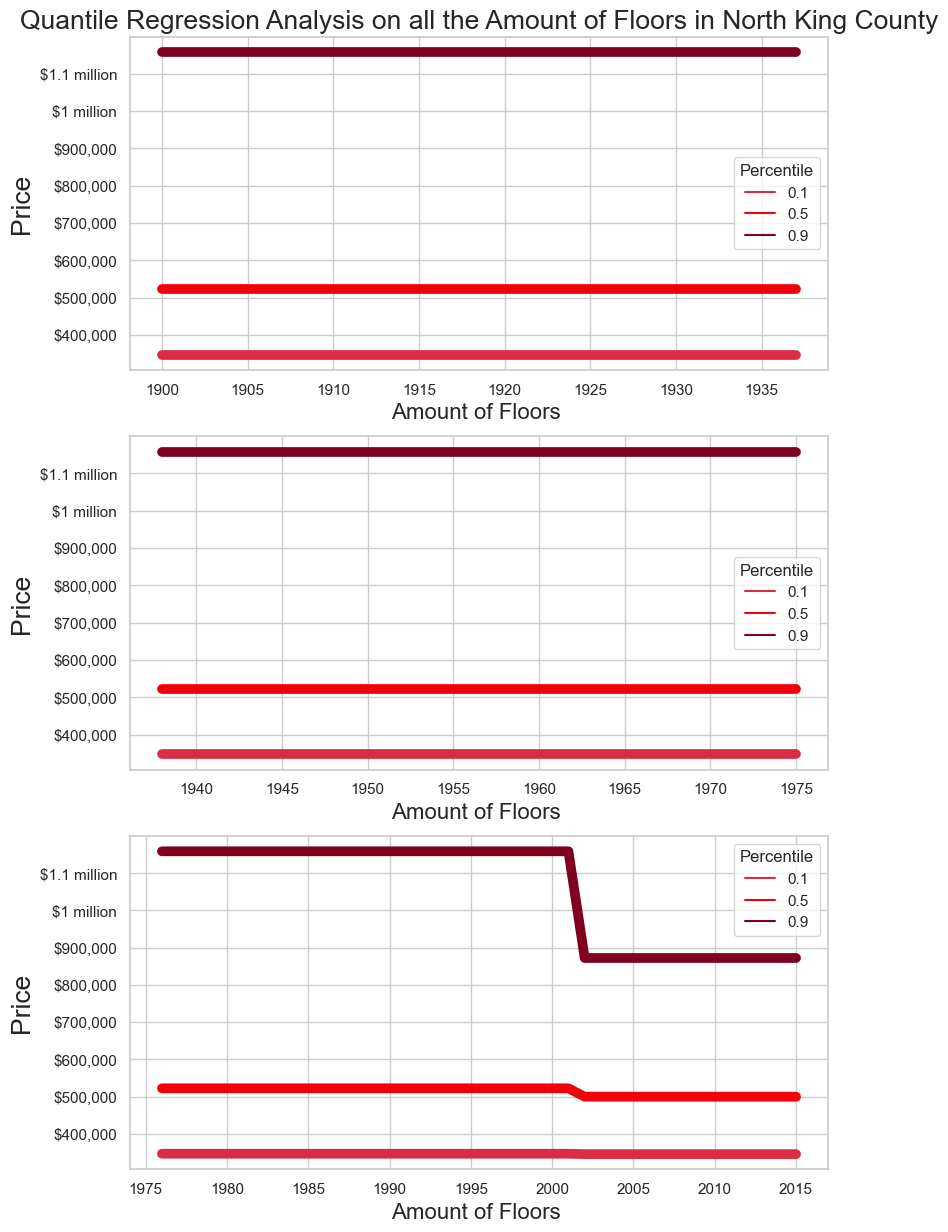

In [115]:
plt.subplot(3,1,1)
sns.set_style("whitegrid")
flatui = ["#DA2C43","#F40009","#800020"]
ax=sns.lineplot( data=melted_data1, x="Year_Built",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15) 
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Amount of Floors in North King County',size=19)
plt.xlabel("Amount of Floors ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
                    '$1 million','$1.1 million'])


plt.subplot(3,1,2)
sns.set_style("whitegrid")
flatui = ["#DA2C43","#F40009","#800020"]
ax=sns.lineplot(  data=melted_data2, x="Year_Built",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)  
plt.legend(title='Percentile')
plt.xlabel("Amount of Floors ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
                    '$1 million','$1.1 million'])


plt.subplot(3,1,3)
sns.set_style("whitegrid")
flatui = ["#DA2C43","#F40009","#800020"]
ax=sns.lineplot( data=melted_data3, x="Year_Built",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
plt.xlabel("Amount of Floors ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
                    '$1 million','$1.1 million'])

In [116]:
(Quantile_regression3['Price'] > Quantile_regression3['0.1']).value_counts()

True     2948
False     500
dtype: int64

In [117]:
i = 0
y= 0
x = []
while i < 2948:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 500:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [118]:
(Quantile_regression3['Price'] > Quantile_regression3['0.5']).value_counts()

False    1895
True     1553
dtype: int64

In [119]:
i = 0
y= 0
x = []
while i < 1895:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1553:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [120]:
(Quantile_regression3['Price'] > Quantile_regression3['0.9']).value_counts()

False    3336
True      112
dtype: int64

In [121]:
i = 0
y= 0
x = []
while i < 3336:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 112:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

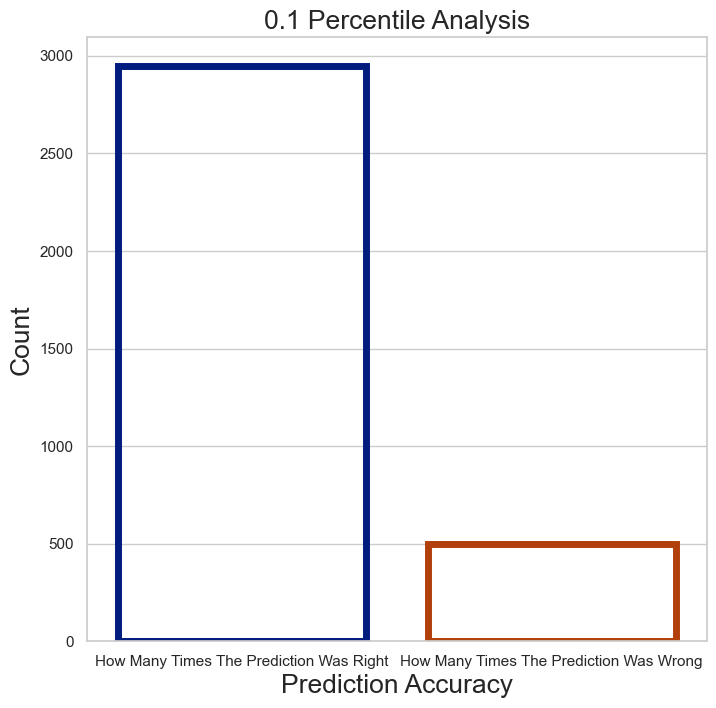

In [122]:
fig = plt.figure()
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

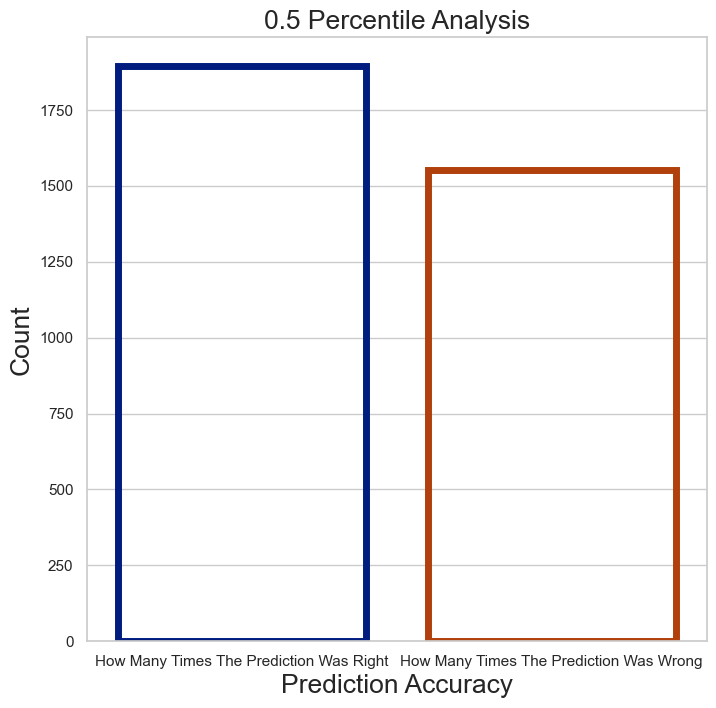

In [123]:
fig = plt.figure()
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

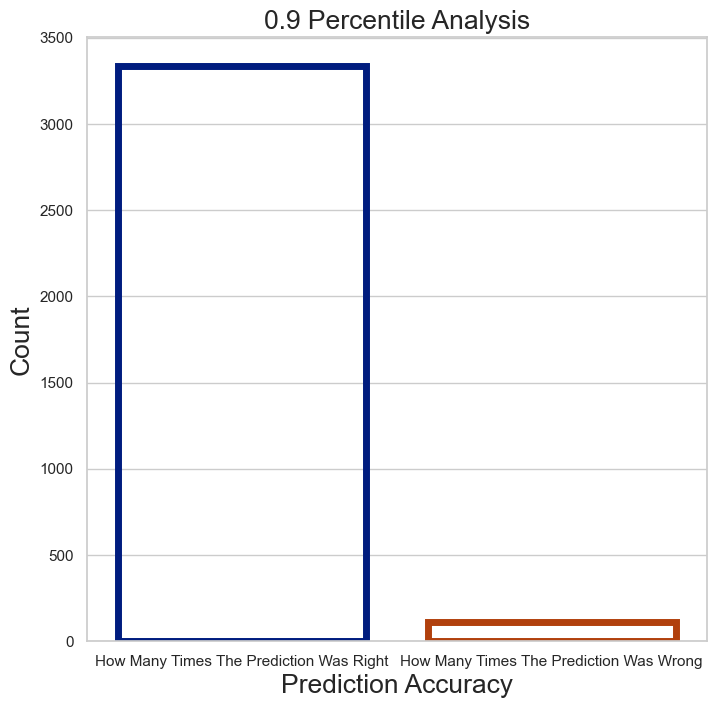

In [124]:
fig = plt.figure()
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [125]:
Predictions3 = []
for i in regressiondata4.Year_Built:
    if i == 1900:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1901:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1902:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1903:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1904:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1905:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1906:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1907:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1908:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1909:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1910:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1911:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1912:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1913:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1914:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1915:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1916:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1917:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1918:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1919:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1920:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1921:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1922:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1923:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1924:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1925:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1926:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1927:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1928:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1929:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1930:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1931:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1932:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1933:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1934:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1935:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1936:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1937:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1938:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1939:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1940:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1941:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1942:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1943:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1944:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1945:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1946:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1947:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1948:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1949:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1950:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1951:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1952:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1953:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1954:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1955:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1956:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1957:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1958:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1959:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1960:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1961:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1962:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1963:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1964:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1965:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1966:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1967:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1968:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1969:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1970:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1971:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1972:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1973:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1974:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1975:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1976:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1977:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1978:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1979:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1980:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1981:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1982:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1983:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1984:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1985:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1986:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1987:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1988:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1989:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1990:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1991:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1992:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1993:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1994:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1995:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1996:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1997:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1998:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1999:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 2000:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 2001:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 2002:Predictions3.append('Between: $346,000 - $871,908')
    if i == 2003:Predictions3.append('Between: $346,000 - $871,908') 
    if i == 2004:Predictions3.append('Between: $346,000 - $871,908') 
    if i == 2005:Predictions3.append('Between: $346,000- $871,908')
    if i == 2006:Predictions3.append('Between: $346,000 - $871,908') 
    if i == 2007:Predictions3.append('Between: $346,000 - $871,908')
    if i == 2008:Predictions3.append('Between: $346,000 - $871,908') 
    if i == 2009:Predictions3.append('Between: $346,000 - $871,908') 
    if i == 2010:Predictions3.append('Between: $346,000 - $871,908') 
    if i == 2011:Predictions3.append('Between: $346,000- $871,908')
    if i == 2012:Predictions3.append('Between: $346,000 - $871,908') 
    if i == 2013:Predictions3.append('Between: $346,000 - $871,908') 
    if i == 2014:Predictions3.append('Between: $346,000 - $871,908') 
    if i == 2015:Predictions3.append('Between: $346,000- $871,908')
len(Predictions3)

3831

In [126]:
price = []
for i in regressiondata4.Price:
    price.append("${:,.0f}".format(i))
len(price)

3831

In [127]:
Prediction3 = pd.DataFrame({'Year Built':regressiondata4.Year_Built,
                           'Prediction':Predictions3,'Actual Price':price})
Prediction3

Year Built                      Prediction Actual Price
0           2014    Between: $346,000 - $871,908     $549,000
1           2014    Between: $346,000 - $871,908     $519,950
2           2014    Between: $346,000 - $871,908     $770,000
3           2014    Between: $346,000 - $871,908     $880,000
4           2014    Between: $346,000 - $871,908   $1,130,000
...          ...                             ...          ...
3826        1934  Between: $347,000 - $1,158,001     $550,000
3827        1934  Between: $347,000 - $1,158,001     $345,950
3828        1934  Between: $347,000 - $1,158,001     $338,000
3829        1934  Between: $347,000 - $1,158,001     $395,000
3830        1934  Between: $347,000 - $1,158,001     $550,000

[3831 rows x 3 columns]

In [128]:
def YEAR_RENOVATED(YEAR):
    
    locations = house_info['Location'].tolist()

    year = house_info['Year Renoveted'].tolist()

    year_index = []
    for i,x in enumerate(year):
        if x == YEAR:year_index.append(i)

    years_northking = []
    for i in year_index:
        if locations[i] == 98133 : years_northking.append(i)
        elif locations[i] == 98155 : years_northking.append(i)
        elif locations[i] == 98177 : years_northking.append(i)
        elif locations[i] == 98115 : years_northking.append(i)
        elif locations[i] == 98107 : years_northking.append(i)
        elif locations[i] == 98133 : years_northking.append(i)
        elif locations[i] == 98033 : years_northking.append(i)
        elif locations[i] == 98133 : years_northking.append(i)
        elif locations[i] == 98103 : years_northking.append(i)
        elif locations[i] == 98072 : years_northking.append(i)
        elif locations[i] == 98028 : years_northking.append(i)
        elif locations[i] == 98072 : years_northking.append(i)
        elif locations[i] == 98077 : years_northking.append(i)
        elif locations[i] == 98155 : years_northking.append(i)
        elif locations[i] == 98133 : years_northking.append(i)
        elif locations[i] == 98077 : years_northking.append(i)
        elif locations[i] == 98177 : years_northking.append(i)
        elif locations[i] == 98072 : years_northking.append(i)
 

    price = house_info["Price"].tolist()

    price_northking = []
    for i in years_northking:price_northking.append(price[i])
    return(price_northking)

year_renovated = house_info["Year Renoveted"].value_counts().index.tolist()
yearrenov_Price_northking = []
for i in year_renovated:
    yearrenov_Price_northking.append(YEAR_RENOVATED(i))
yearrenov_Price_northking = sum(yearrenov_Price_northking, [])
len(yearrenov_Price_northking)

3133

In [129]:
def AMOUNT_YEAR_RENOVATED(AMOUNT_YEAR):
    locations = house_info['Location'].tolist()

    year_renovated = house_info["Year Renoveted"].tolist()
    X_value = []
    year_index = []
    for i,x in enumerate(year_renovated):
        if x == AMOUNT_YEAR:year_index.append(i)

    for i in year_index:
        if locations[i] == 98133 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98155 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98177 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98115 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98107 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98133 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98033 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98133 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98103 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98072: X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98028 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98072 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98077 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98155 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98133 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98077 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98177 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98072 : X_value.append(AMOUNT_YEAR)

    return X_value
year = house_info["Year Renoveted"].value_counts().index.tolist()
year_northking = []
for i in year:
    year_northking.append(AMOUNT_YEAR_RENOVATED(i))
year_northking= sum(year_northking, [])
len(year_northking)

3133

In [130]:
regressiondata5 = pd.DataFrame({'Year_Renoveted':year_northking,
                                'Price':yearrenov_Price_northking})
regressiondata5[2988:]
re5 = regressiondata5[2988:]
regressiondata5
x = re5.Year_Renoveted.value_counts()
len(x)

49

In [131]:
flatui = ['#e5b8bc',
    
          '#f5c3c8','#fbe1e3','#f1d0d3','#f6c5c9','#f9b8be',
          
          '#fca7af','#f89ea6','#ee8e97','#ee6974','#fb717d',
          
         
          
          '#fb1529','#fb3a17','#f13512','#e04528','#e02a08',
          '#f35e6b','#e84c5a','#fc3446','#fe1b2f','#f31327',
          '#e92637','#ec2739','#d50315','#d30c1d','#d82737',
           '#fa1e4e','#ee365e','#f91b3b','#ec314c','#dd2e47',
          
          '#d80517','#cc1021','#bf1d2c','#ae2531','#a10311',
          '#99111d','#8c1923','#6c1d24','#632127','#571f24',
          
          '#3d0207','#38090d','#471115','#351114','#281214',
          '#a9898c','#926468','#714a4e',#'#6c464a','#594446',
          
          #'#d3d1d1','#adacac','#807879'#,'#5c5051',
          #'#685456','#3d3737','#7f6668'#,'#5f5354',
         ]
len(flatui)#49

49

<ipython-input-132-571ac5b88404>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million'])


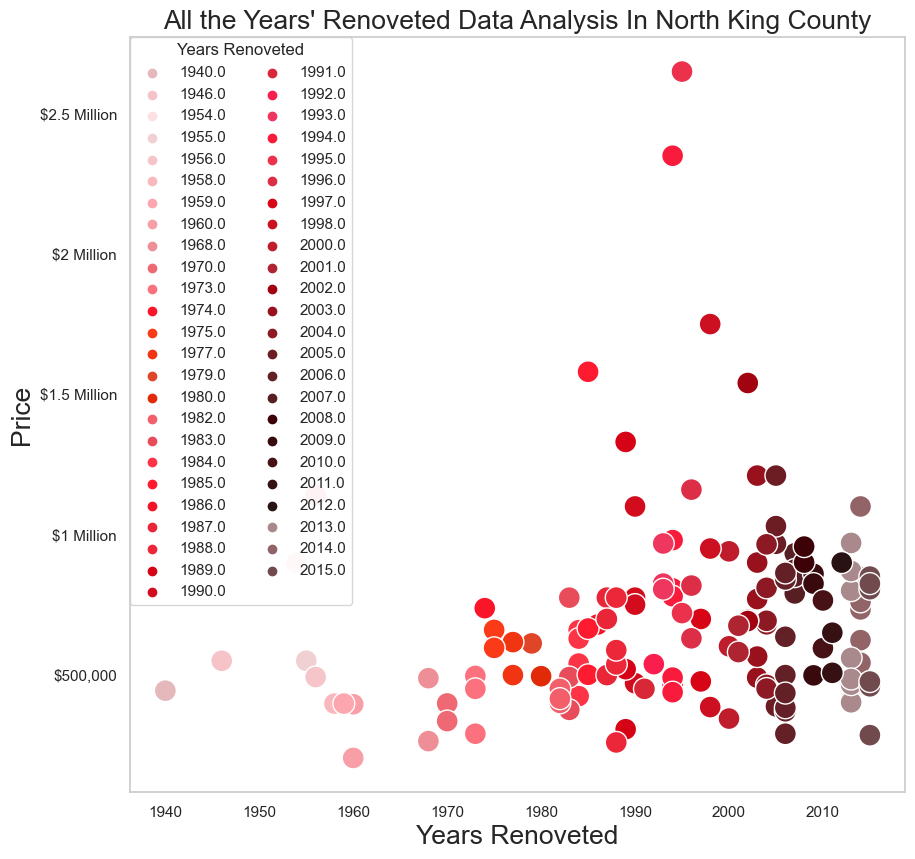

In [132]:
x = regressiondata5[2988:]['Year_Renoveted']
y = regressiondata5[2988:]['Price']
#plt.xticks(np.arange(1900,2000))
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=re5, x=x, y=y,s=250, linewidth = 1,
                    hue='Year_Renoveted',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Years\' Renoveted Data Analysis In North King County',size=19)
plt.xlabel("Years Renoveted", size=19)
plt.legend(title='Years Renoveted')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million'])
plt.gcf().set_size_inches((10,10))
plt.legend( loc='upper left', borderaxespad=0,title="Years Renoveted",
          frameon=True, ncol=2)
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [133]:
train_df, test_df = train_test_split(regressiondata5, test_size=0.10, shuffle=False)

In [134]:
X_train, y_train = train_df[['Year_Renoveted']], train_df[['Price']]
X_test, y_test = test_df[['Year_Renoveted']], test_df[['Price']]

In [135]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [136]:
Quantile_regression4 = pd.DataFrame({'Year_Renoveted': X_test.reset_index()['Year_Renoveted'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [137]:
Quantile_regression4 = Quantile_regression4.drop(range(0,169))
Quantile_regression4

Year_Renoveted           0.1       0.5       0.9     Price
169          2014.0  323900.15625  500000.0  850000.0  835000.0
170          2014.0  323900.15625  500000.0  850000.0  478000.0
171          2014.0  323900.15625  500000.0  850000.0  535000.0
172          2014.0  323900.15625  500000.0  850000.0  849000.0
173          2014.0  323900.15625  500000.0  850000.0  543000.0
..              ...           ...       ...       ...       ...
309          1974.0  323900.15625  500000.0  850000.0  737500.0
310          1940.0  323900.15625  500000.0  850000.0  443500.0
311          1954.0  323900.15625  500000.0  850000.0  900000.0
312          1946.0  323900.15625  500000.0  850000.0  550000.0
313          1959.0  323900.15625  500000.0  850000.0  397500.0

[145 rows x 5 columns]

In [138]:
melted_data5 = pd.melt(Quantile_regression4, id_vars=['Year_Renoveted'])
melted_data5 = melted_data5.drop(range(435,580))
melted_data5 = melted_data5.rename(columns={'variable': 'Percentile'})
melted_data5

Year_Renoveted Percentile         value
0            2014.0        0.1  323900.15625
1            2014.0        0.1  323900.15625
2            2014.0        0.1  323900.15625
3            2014.0        0.1  323900.15625
4            2014.0        0.1  323900.15625
..              ...        ...           ...
430          1974.0        0.9  850000.00000
431          1940.0        0.9  850000.00000
432          1954.0        0.9  850000.00000
433          1946.0        0.9  850000.00000
434          1959.0        0.9  850000.00000

[435 rows x 3 columns]

<ipython-input-139-01390d1217dc>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000'])


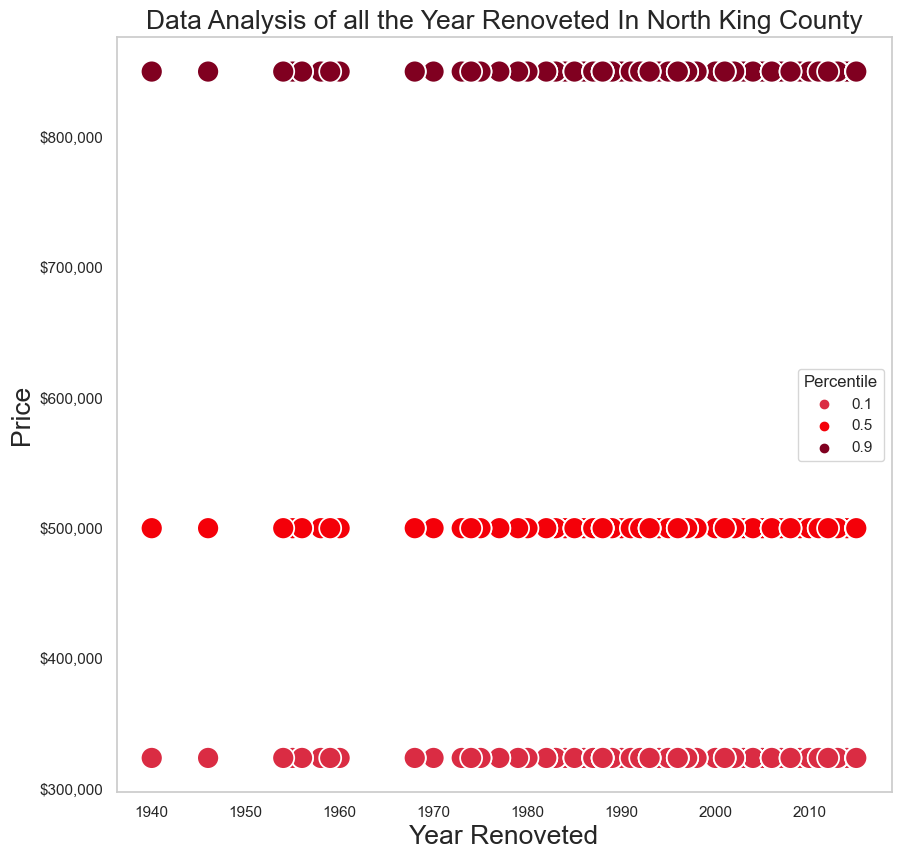

In [139]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#DA2C43","#F40009","#800020"]
ax =sns.scatterplot(data=melted_data5, x="Year_Renoveted",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Year Renoveted In North King County',size=19)
plt.xlabel("Year Renoveted'", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year Renoveted")
plt.gcf().set_size_inches((10,10))

<ipython-input-140-9aaf1701a480>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000'])


[Text(0, 200000.0, '0'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '')]

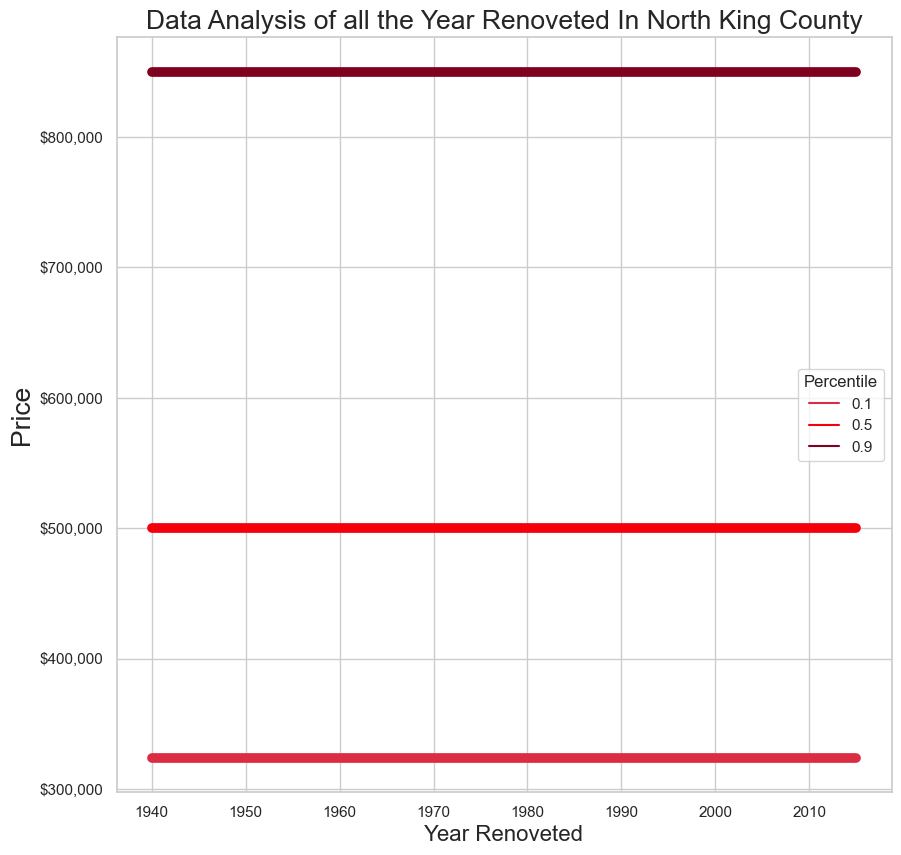

In [140]:
sns.set_style("whitegrid")
flatui = ["#DA2C43","#F40009","#800020"]
ax=sns.lineplot( data=melted_data5, x="Year_Renoveted",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
ax.set_title('Data Analysis of all the Year Renoveted In North King County',size=19)
plt.legend(title='Percentile')
plt.xlabel("Year Renoveted", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000'])

In [141]:
(Quantile_regression4['Price'] > Quantile_regression4['0.1']).value_counts()

True     138
False      7
dtype: int64

In [142]:
i = 0
y= 0
x = []
while i < 138:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 7:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [143]:
(Quantile_regression4['Price'] > Quantile_regression4['0.5']).value_counts()

True     93
False    52
dtype: int64

In [144]:
i = 0
y= 0
x = []
while i < 93:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 52:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [145]:
(Quantile_regression4['Price'] > Quantile_regression4['0.9']).value_counts()

False    115
True      30
dtype: int64

In [146]:
i = 0
y= 0
x = []
while i < 115:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 30:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

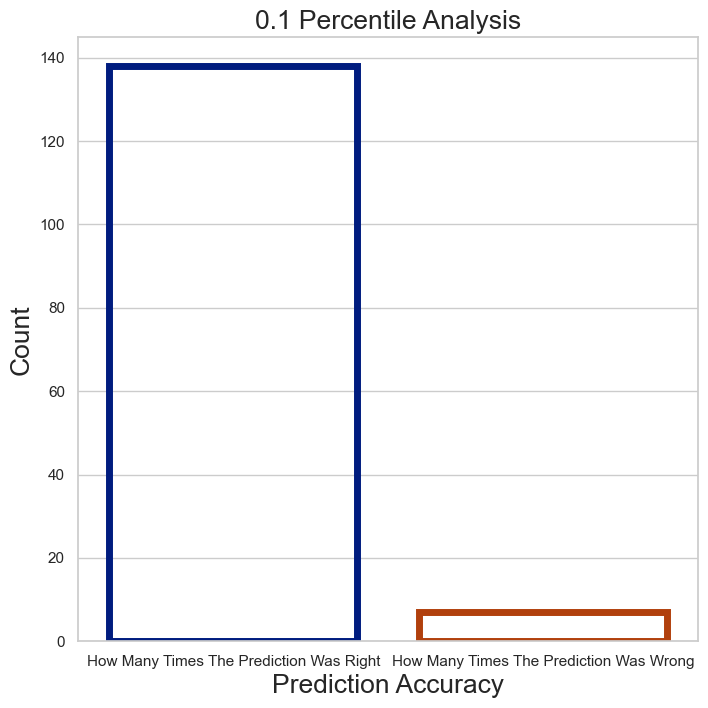

In [147]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

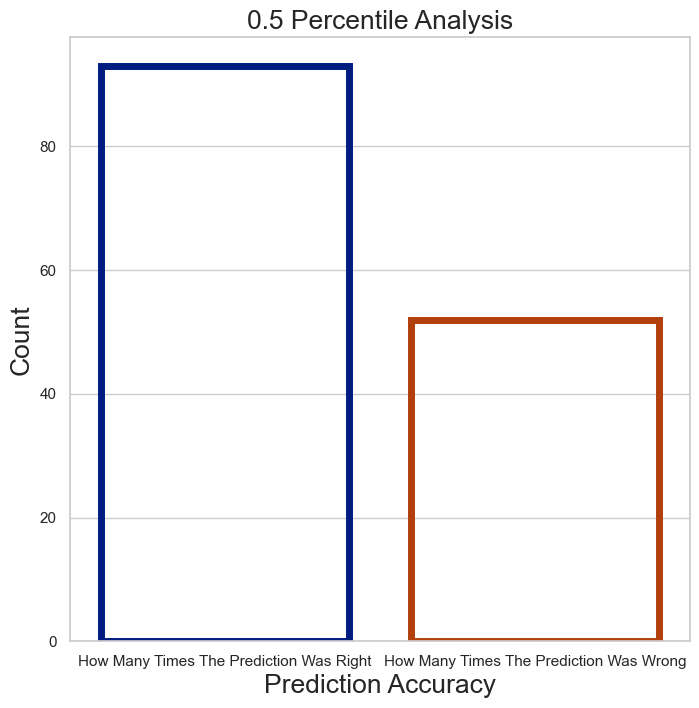

In [148]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

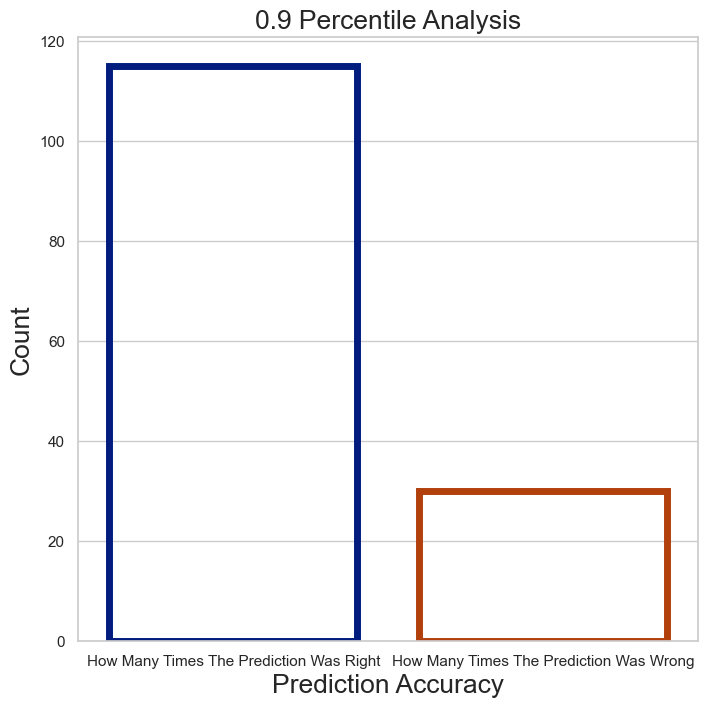

In [149]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [150]:
Predictions3 = []
for i in regressiondata5.Year_Renoveted:
    if i == 0:  Predictions3.append('Between: $323,900 - $850,000')
    if i == 1940:  Predictions3.append('Between: $323,900 - $850,000') 
    if i == 1946:  Predictions3.append('Between: $323,900 - $850,000') 
    if i == 1950:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 1951:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 1952:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 1953:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1954:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1955:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1956:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1957:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1958:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1959:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1960:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1961:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1962:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1963:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1964:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1965:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 1966:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1967:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 1968:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1969:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1970:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1971:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1972:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1973:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1974:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1975:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1976:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 1977:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1978:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1979:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1980:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1981:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 1982:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 1983:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1984:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1985:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1986:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 1987:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1988:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1989:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 1990:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1991:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1992:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1993:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1994:Predictions3.append('Between: $323,900 - $850,000')
    if i == 1995:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 1996:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 1997:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 1998:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 1999:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 2000:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 2001:Predictions3.append('Between: $323,900 - $850,000')
    if i == 2002:Predictions3.append('Between: $323,900 - $850,000')
    if i == 2003:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 2004:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 2005:Predictions3.append('Between: $323,900 - $850,000')
    if i == 2006:Predictions3.append('Between: $323,900 - $850,000')
    if i == 2007:Predictions3.append('Between: $323,900 - $850,000')
    if i == 2008:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 2009:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 2010:Predictions3.append('Between: $323,900 - $850,000')
    if i == 2011:Predictions3.append('Between: $323,900 - $850,000')
    if i == 2012:Predictions3.append('Between: $323,900 - $850,000')
    if i == 2013:Predictions3.append('Between: $323,900 - $850,000')
    if i == 2014:Predictions3.append('Between: $323,900 - $850,000') 
    if i == 2015:Predictions3.append('Between: $323,900 - $850,000')
len(Predictions3)
len(price)

3831

In [151]:
price = []
for i in regressiondata5.Price:
    price.append("${:,.0f}".format(i))

In [152]:
Prediction4 = pd.DataFrame({'Year Renoveted':regressiondata5.Year_Renoveted,
                           'Prediction':Predictions3,'Actual Price':price})
Prediction4

Year Renoveted                    Prediction Actual Price
0                0.0  Between: $323,900 - $850,000     $468,000
1                0.0  Between: $323,900 - $850,000     $530,000
2                0.0  Between: $323,900 - $850,000     $485,000
3                0.0  Between: $323,900 - $850,000     $385,000
4                0.0  Between: $323,900 - $850,000     $280,000
...              ...                           ...          ...
3128          1974.0  Between: $323,900 - $850,000     $737,500
3129          1940.0  Between: $323,900 - $850,000     $443,500
3130          1954.0  Between: $323,900 - $850,000     $900,000
3131          1946.0  Between: $323,900 - $850,000     $550,000
3132          1959.0  Between: $323,900 - $850,000     $397,500

[3133 rows x 3 columns]

In [153]:
def CONDITION(LEVEL_CONDITION):
    
    locations = house_info['Location'].tolist()

    condition_level = house_info['Condition'].tolist()

    condition_index = []
    for i,x in enumerate(condition_level):
        if x == LEVEL_CONDITION:condition_index.append(i)

    level_northking = []
    for i  in condition_index:
        if locations[i] == 98133 :  level_northking.append(i)
        elif locations[i] == 98155 : level_northking.append(i)
        elif locations[i] == 98177 : level_northking.append(i)
        elif locations[i] == 98115 : level_northking.append(i)
        elif locations[i] == 98107 : level_northking.append(i)
        elif locations[i] == 98133 : level_northking.append(i)
        elif locations[i] == 98033 : level_northking.append(i)
        elif locations[i] == 98133 : level_northking.append(i)
        elif locations[i] == 98103 : level_northking.append(i)
        elif locations[i] == 98072:  level_northking.append(i)
        elif locations[i] == 98028 : level_northking.append(i)
        elif locations[i] == 98072 : level_northking.append(i)
        elif locations[i] == 98077 : level_northking.append(i)
        elif locations[i] == 98155 : level_northking.append(i)
        elif locations[i] == 98133 : level_northking.append(i)
        elif locations[i] == 98077 : level_northking.append(i)
        elif locations[i] == 98177 : level_northking.append(i)
        elif locations[i] == 98072 : level_northking.append(i)
    
    price = house_info["Price"].tolist()

    price_northking = []
    for i in level_northking:price_northking.append(price[i])
    return(price_northking)

condition_level = house_info["Condition"].value_counts().index.tolist()
level_northking = []
for i in condition_level:
    level_northking.append(CONDITION(i))
level_northking= sum(level_northking, [])
len(level_northking)

3831

In [154]:
def AMOUNT_LEVEL(AMOUNT_LEVEL):
    locations = house_info['Location'].tolist()

    condtions = house_info["Condition"].tolist()
    X_value = []
    level_index = []
    for i,x in enumerate(condtions):
        if x == AMOUNT_LEVEL:level_index.append(i)

    for i in level_index:
        if locations[i] == 98133 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98155 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98177 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98115 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98107 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98133 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98033 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98133 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98103 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98072: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98028 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98072 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98077 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98155 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98133 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98077 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98177 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98072 : X_value.append(AMOUNT_LEVEL)
    return X_value
level = house_info["Condition"].value_counts().index.tolist()
condtition_level_northking = []
for i in level:
    condtition_level_northking.append(AMOUNT_LEVEL(i))
condtition_level_northking= sum(condtition_level_northking, [])
len(condtition_level_northking)

3831

In [155]:
regressiondata6 = pd.DataFrame({'Condition_Level':condtition_level_northking,
                                'Price':level_northking})
regressiondata6

Condition_Level     Price
0                   3  180000.0
1                   3  530000.0
2                   3  438000.0
3                   3  280000.0
4                   3  696000.0
...               ...       ...
3826                2  305000.0
3827                1  352950.0
3828                1  535000.0
3829                1  196000.0
3830                1  305000.0

[3831 rows x 2 columns]

<ipython-input-156-bc364ec34582>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million'])


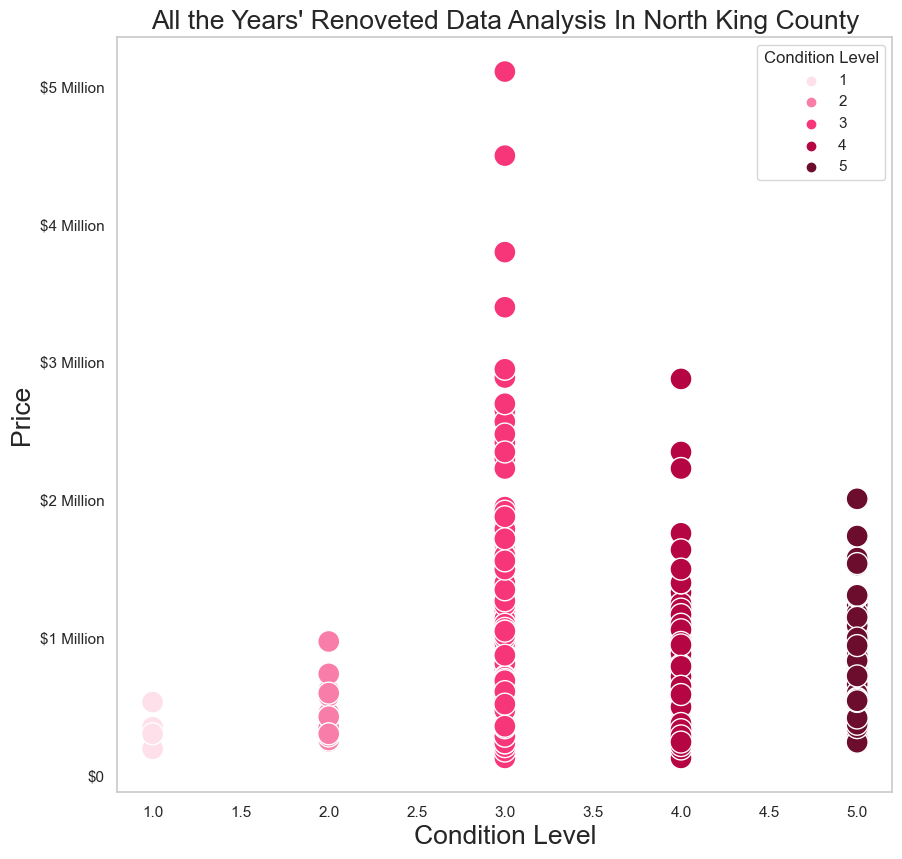

In [156]:
flatui = ['#fde0ea','#f87da8','#f73579','#b50542','#6c0d2e']

x = regressiondata6['Condition_Level']
y = regressiondata6['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata6, x=x, y=y,s=250, linewidth = 1,
                    hue='Condition_Level',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Years\' Renoveted Data Analysis In North King County',size=19)
plt.xlabel("Condition Level", size=19)
plt.legend(title='Condition Level')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [157]:
train_df, test_df = train_test_split(regressiondata6, test_size=0.10, shuffle=False)

In [158]:
X_train, y_train = train_df[['Condition_Level']], train_df[['Price']]
X_test, y_test = test_df[['Condition_Level']], test_df[['Price']]

In [159]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [160]:
Quantile_regression5 = pd.DataFrame({'Condition_Level': X_test.reset_index()['Condition_Level'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})
Quantile_regression5

Condition_Level            0.1            0.5            0.9     Price
0                  5  350699.337208  529999.176597  824501.074425  625000.0
1                  5  350699.337208  529999.176597  824501.074425  605000.0
2                  5  350699.337208  529999.176597  824501.074425  780000.0
3                  5  350699.337208  529999.176597  824501.074425  340895.0
4                  5  350699.337208  529999.176597  824501.074425  715000.0
..               ...            ...            ...            ...       ...
379                2  320000.132807  499949.974767  891749.129270  305000.0
380                1  320000.132807  499949.974767  891749.129270  352950.0
381                1  320000.132807  499949.974767  891749.129270  535000.0
382                1  320000.132807  499949.974767  891749.129270  196000.0
383                1  320000.132807  499949.974767  891749.129270  305000.0

[384 rows x 5 columns]

In [226]:
row_df = pd.DataFrame({'Condition_Level':[4],'0.1':[350699.337208],'0.5':[529999.176597],
                       '0.9':[824501.074425]
                       ,'Price':[0]})
Quantile_regression5 = pd.concat([row_df, Quantile_regression5], ignore_index=True)
Quantile_regression5

Condition_Level            0.1            0.5            0.9     Price
0                  4  350699.337208  529999.176597  824501.074425       0.0
1                  4  350699.337208  529999.176597  824501.074425       0.0
2                  5  350699.337208  529999.176597  824501.074425  625000.0
3                  5  350699.337208  529999.176597  824501.074425  605000.0
4                  5  350699.337208  529999.176597  824501.074425  780000.0
..               ...            ...            ...            ...       ...
381                2  320000.132807  499949.974767  891749.129270  305000.0
382                1  320000.132807  499949.974767  891749.129270  352950.0
383                1  320000.132807  499949.974767  891749.129270  535000.0
384                1  320000.132807  499949.974767  891749.129270  196000.0
385                1  320000.132807  499949.974767  891749.129270  305000.0

[386 rows x 5 columns]

In [227]:
melted_data6 = pd.melt(Quantile_regression5, id_vars=['Condition_Level'])
melted_data6 = melted_data6.drop(range(1158,1544))
melted_data6 = melted_data6.rename(columns={'variable': 'Percentile'})
melted_data6

Condition_Level Percentile          value
0                   4        0.1  350699.337208
1                   4        0.1  350699.337208
2                   5        0.1  350699.337208
3                   5        0.1  350699.337208
4                   5        0.1  350699.337208
...               ...        ...            ...
1153                2        0.9  891749.129270
1154                1        0.9  891749.129270
1155                1        0.9  891749.129270
1156                1        0.9  891749.129270
1157                1        0.9  891749.129270

[1158 rows x 3 columns]

<ipython-input-228-9f66f63c1e8d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000'])


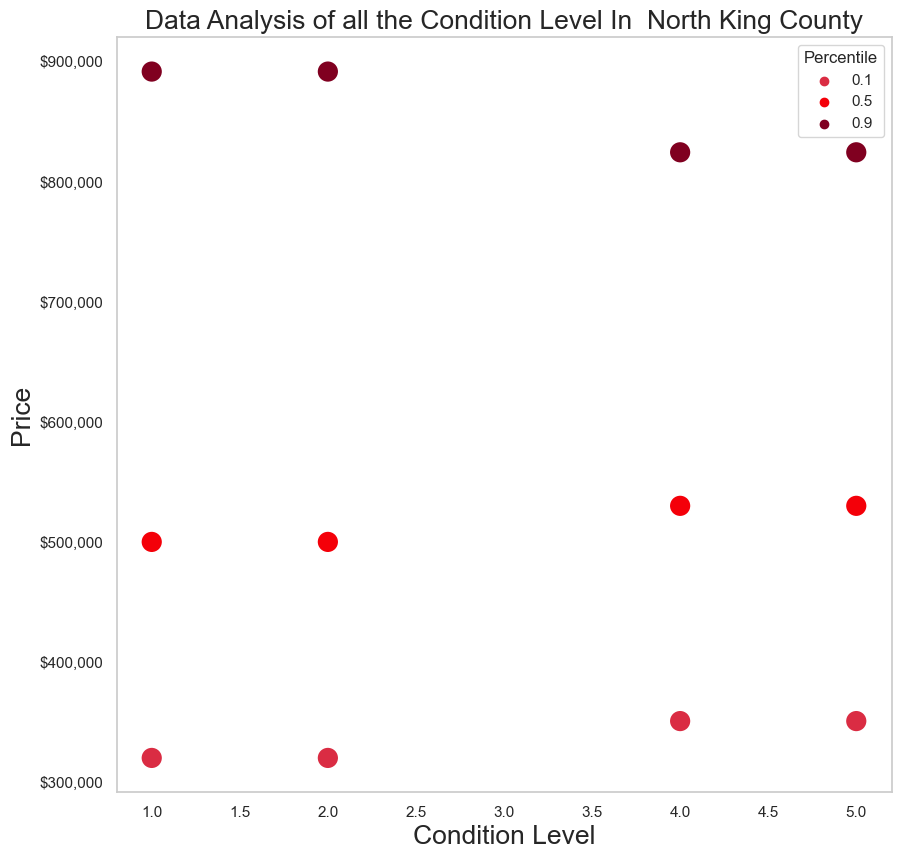

In [228]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#DA2C43","#F40009","#800020"]
ax =sns.scatterplot(data=melted_data6, x="Condition_Level",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Condition Level In  North King County',size=19)
plt.xlabel("Condition Level", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Condition Level")
plt.gcf().set_size_inches((10,10))

<ipython-input-229-9f96ebb9d5f5>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000'])


[Text(0, 200000.0, '0'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '$900,000'),
 Text(0, 1000000.0, '')]

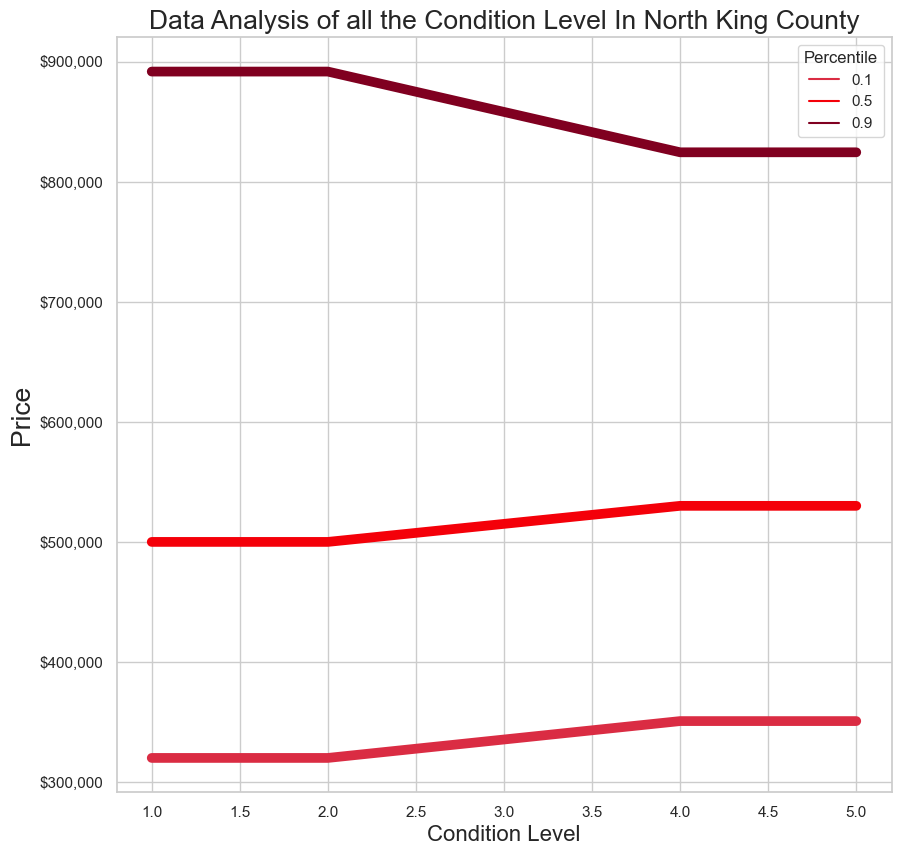

In [229]:
sns.set_style("whitegrid")
flatui = ["#DA2C43","#F40009","#800020"]
ax=sns.lineplot( data=melted_data6, x="Condition_Level",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
ax.set_title('Data Analysis of all the Condition Level In North King County',size=19)
plt.legend(title='Percentile')
plt.xlabel("Condition Level", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000'])

In [165]:
(Quantile_regression5['Price'] > Quantile_regression5['0.1']).value_counts()

True     345
False     40
dtype: int64

In [166]:
i = 0
y= 0
x = []
while i < 345:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 41:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [167]:
(Quantile_regression5['Price'] > Quantile_regression5['0.5']).value_counts()

True     234
False    151
dtype: int64

In [168]:
i = 0
y= 0
x = []
while i < 234:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 152:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [169]:
(Quantile_regression5['Price'] > Quantile_regression5['0.9']).value_counts()

False    332
True      53
dtype: int64

In [170]:
i = 0
y= 0
x = []
while i < 333:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 53:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

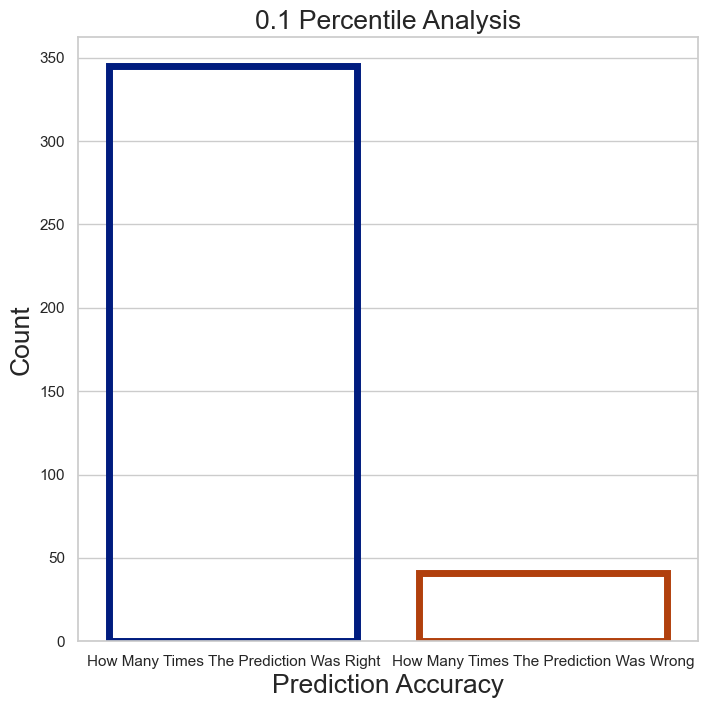

In [171]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

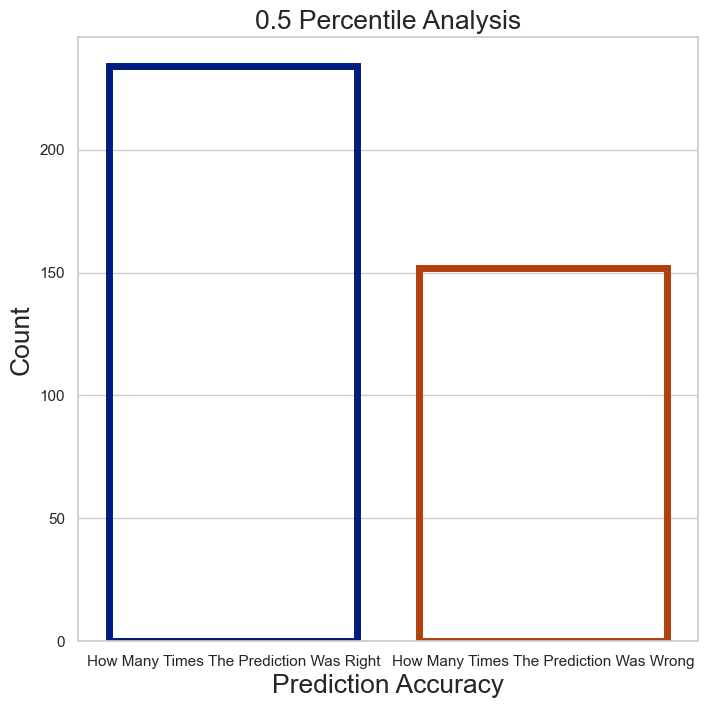

In [172]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

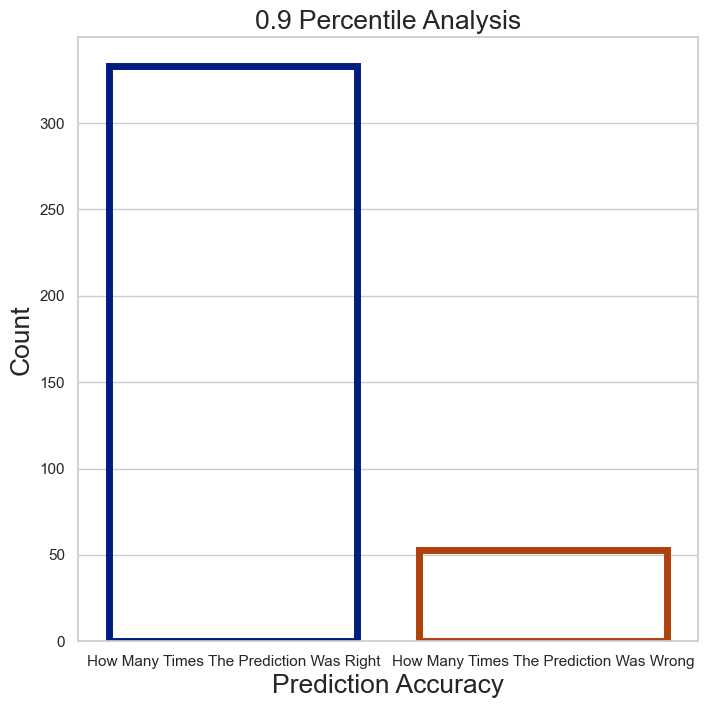

In [173]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [174]:
Predictions5 = []
for i in regressiondata6.Condition_Level:
    if i == 1:Predictions5.append('Between: $320,000 - $891,749') 
    if i == 2:Predictions5.append('Between: $320,000 - $891,749') 
    if i == 3:Predictions5.append('Between: $320,000 - $891,749')
    if i == 4:Predictions5.append('Between: $350,699 - $824,501') 
    if i == 5: Predictions5.append('Between: $350,699 - $824,501')
len(Predictions5)

3831

In [175]:
price = []
for i in regressiondata6.Price:
    price.append("${:,.0f}".format(i))

In [176]:
Prediction5 = pd.DataFrame({'Condition Level':regressiondata6.Condition_Level,
                           'Prediction':Predictions5,'Actual Price':price})
Prediction5

Condition Level                    Prediction Actual Price
0                   3  Between: $320,000 - $891,749     $180,000
1                   3  Between: $320,000 - $891,749     $530,000
2                   3  Between: $320,000 - $891,749     $438,000
3                   3  Between: $320,000 - $891,749     $280,000
4                   3  Between: $320,000 - $891,749     $696,000
...               ...                           ...          ...
3826                2  Between: $320,000 - $891,749     $305,000
3827                1  Between: $320,000 - $891,749     $352,950
3828                1  Between: $320,000 - $891,749     $535,000
3829                1  Between: $320,000 - $891,749     $196,000
3830                1  Between: $320,000 - $891,749     $305,000

[3831 rows x 3 columns]

In [183]:
def SQFT_LOT(SQFT_LOTS):
    
    locations = house_info['Location'].tolist()

    sqft_lot = house_info['Sqft_lot'].tolist()

    lot_index = []
    for i,x in enumerate(sqft_lot):
        if x == SQFT_LOTS:lot_index.append(i)

    lot_northking = []
    for i in lot_index:
        if locations[i] == 98133 :  lot_northking.append(i)
        elif locations[i] == 98155 :  lot_northking.append(i)
        elif locations[i] == 98177 :  lot_northking.append(i)
        elif locations[i] == 98115 :  lot_northking.append(i)
        elif locations[i] == 98107 :  lot_northking.append(i)
        elif locations[i] == 98133 :  lot_northking.append(i)
        elif locations[i] == 98033 :  lot_northking.append(i)
        elif locations[i] == 98133 :  lot_northking.append(i)
        elif locations[i] == 98103 :  lot_northking.append(i)
        elif locations[i] == 98072 :  lot_northking.append(i)
        elif locations[i] == 98028 :  lot_northking.append(i)
        elif locations[i] == 98072 :  lot_northking.append(i)
        elif locations[i] == 98077 :  lot_northking.append(i)
        elif locations[i] == 98155 :  lot_northking.append(i)
        elif locations[i] == 98133 :  lot_northking.append(i)
        elif locations[i] == 98077 :  lot_northking.append(i)
        elif locations[i] == 98177 :  lot_northking.append(i)
        elif locations[i] == 98072 :  lot_northking.append(i)

    price = house_info["Price"].tolist()

    price_northking = []
    for i in lot_northking:price_northking.append(price[i])
    return(price_northking)

no_of_sqft_lot = house_info["Sqft_lot"].value_counts().index.tolist()
price_lot_northking = []
for i in no_of_sqft_lot:
    price_lot_northking.append(SQFT_LOT(i))
price_lot_northking= sum(price_lot_northking, [])
len(price_lot_northking)

3831

In [185]:
def AMOUNT_LOT(AMOUNT_LOTS):
    locations = house_info['Location'].tolist()

    sqft_lot = house_info['Sqft_lot'].tolist()
    X_value = []
    lot_index = []
    for i,x in enumerate(sqft_lot):
        if x == AMOUNT_LOTS:lot_index.append(i)

    for i in lot_index:
        if locations[i] == 98133 :   X_value.append(AMOUNT_LOTS)
        elif locations[i] == 98155 : X_value.append(AMOUNT_LOTS)
        elif locations[i] == 98177 : X_value.append(AMOUNT_LOTS)
        elif locations[i] == 98115 : X_value.append(AMOUNT_LOTS)
        elif locations[i] == 98107 : X_value.append(AMOUNT_LOTS)
        elif locations[i] == 98133 : X_value.append(AMOUNT_LOTS)
        elif locations[i] == 98033 : X_value.append(AMOUNT_LOTS)
        elif locations[i] == 98133 : X_value.append(AMOUNT_LOTS)
        elif locations[i] == 98103 : X_value.append(AMOUNT_LOTS)
        elif locations[i] == 98072:  X_value.append(AMOUNT_LOTS)
        elif locations[i] == 98028 : X_value.append(AMOUNT_LOTS)
        elif locations[i] == 98072 : X_value.append(AMOUNT_LOTS)
        elif locations[i] == 98077 : X_value.append(AMOUNT_LOTS)
        elif locations[i] == 98155 : X_value.append(AMOUNT_LOTS)
        elif locations[i] == 98133 : X_value.append(AMOUNT_LOTS)
        elif locations[i] == 98077 : X_value.append(AMOUNT_LOTS)
        elif locations[i] == 98177 : X_value.append(AMOUNT_LOTS)
        elif locations[i] == 98072 : X_value.append(AMOUNT_LOTS)

    return X_value
no_of_sqft_lot = house_info["Sqft_lot"].value_counts().index.tolist()
amount_lot_northking = []
for i in no_of_sqft_lot:
    amount_lot_northking.append(AMOUNT_LOT(i))
amount_lot_northking= sum(amount_lot_northking, [])
len(amount_lot_northking)

3831

In [200]:
regressiondata8 = pd.DataFrame({'Amount_of_Lot':amount_lot_northking,
                                'Price':price_lot_northking})

In [201]:
#taking away outlyers
numbers = []
lots = []
index = []
for i,x in enumerate(regressiondata8.Amount_of_Lot):
    numbers.append(regressiondata8.Price[i])
    lots.append(x)
    #print(i,x,regressiondata8.Price[i])
    
#for x,i in enumerate(numbers):
    #if 600000 <= i <= 800000:print(i,x,regressiondata8.Amount_of_Lot[x])

for x,i in enumerate(lots):
    if 150000 <= i :
        index.append(x)
        #print(x,i,regressiondata8.Price[x])
        

for i in index:
    regressiondata8= regressiondata8.drop(i)

regressiondata8

Amount_of_Lot     Price
0              5000  560000.0
1              5000  470000.0
2              5000  455000.0
3              5000  640000.0
4              5000  280300.0
...             ...       ...
3826           7451  352500.0
3827           1336  479950.0
3828          21810  840000.0
3829          21794  875000.0
3830          11549  525000.0

[3809 rows x 2 columns]

<ipython-input-221-90291a1aa265>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million'])


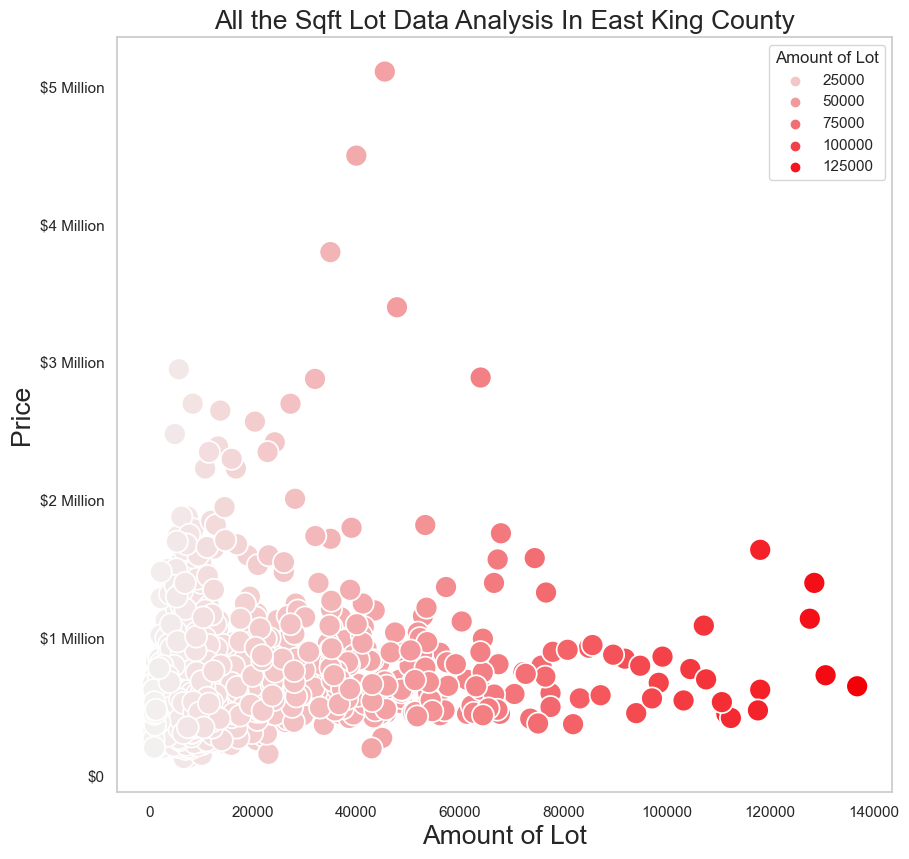

In [221]:
x = regressiondata8['Amount_of_Lot']
y = regressiondata8['Price']
sns.set(style='whitegrid')
cmap = sns.light_palette("#F40009", as_cmap=True)

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata8, x=x, y=y,s=250,hue='Amount_of_Lot'
                     ,palette=cmap)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Sqft Lot Data Analysis In East King County',size=19)
plt.xlabel("Amount of Lot", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Lot')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million'])
plt.show()

In [204]:
train_df, test_df = train_test_split(regressiondata8, test_size=0.10, shuffle=False)

In [205]:
X_train, y_train = train_df[['Amount_of_Lot']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Lot']], test_df[['Price']]

In [206]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [207]:
Quantile_regression7 = pd.DataFrame({'Amount_of_Lot': X_test.reset_index()['Amount_of_Lot'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})
Quantile_regression7[100:]

Amount_of_Lot            0.1            0.5           0.9     Price
100          15886  354746.254480  523568.269016  8.957266e+05  675000.0
101          36360  513624.722173  699398.548948  1.021748e+06  635000.0
102           9693  342677.379653  415103.245060  7.576506e+05  245560.0
103          25870  409940.516812  630483.364991  1.329669e+06  725000.0
104           1481  273803.410994  455187.661038  6.187770e+05  550000.0
..             ...            ...            ...           ...       ...
376           7451  325003.983936  503621.895598  7.412251e+05  352500.0
377           1336  349949.221443  443385.053860  6.099968e+05  479950.0
378          21810  303901.845467  598604.418518  1.247832e+06  840000.0
379          21794  303901.845467  598604.418518  1.247832e+06  875000.0
380          11549  358347.501033  509697.508249  1.236436e+06  525000.0

[281 rows x 5 columns]

In [216]:
melted_data8 = pd.melt(Quantile_regression7, id_vars=['Amount_of_Lot'])
melted_data8 = melted_data8.drop(range(1143,1524))
melted_data8 = melted_data8.rename(columns={'variable': 'Percentile'})
melted_data8

Amount_of_Lot Percentile         value
0              5334        0.1  3.270268e+05
1             10208        0.1  3.321909e+05
2              5910        0.1  2.748738e+05
3             41041        0.1  4.940294e+05
4             10304        0.1  2.899985e+05
...             ...        ...           ...
1138           7451        0.9  7.412251e+05
1139           1336        0.9  6.099968e+05
1140          21810        0.9  1.247832e+06
1141          21794        0.9  1.247832e+06
1142          11549        0.9  1.236436e+06

[1143 rows x 3 columns]

<ipython-input-218-5c2f707db824>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',


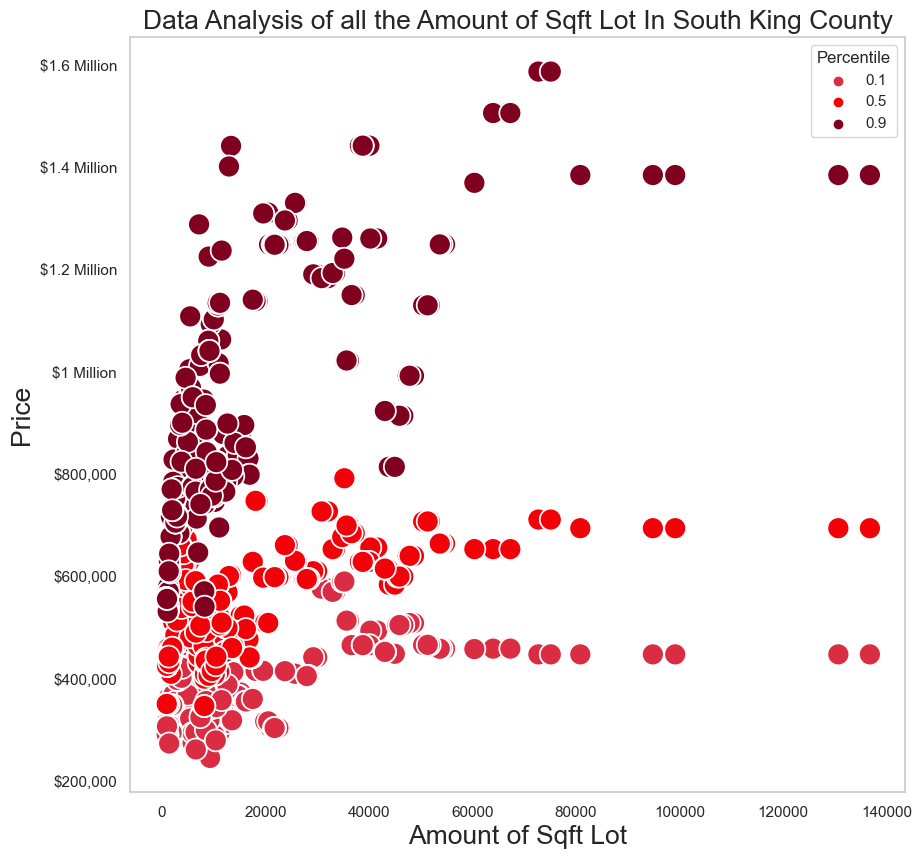

In [218]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#DA2C43","#F40009","#800020"]
ax =sns.scatterplot(data=melted_data8, x="Amount_of_Lot",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Amount of Sqft Lot In South King County',size=19)
plt.xlabel("Amount of Sqft Lot", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',
                      '$1.2 Million','$1.4 Million','$1.6 Million',])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Sqft Lot")
plt.gcf().set_size_inches((10,10))

In [331]:
values = []
amount = []
for i, x in enumerate(Quantile_regression7.Amount_of_Lot):
        if 40001 <= x<= 140000:values.append(Quantile_regression7['0.1'][i])
        if 40001 <= x<= 140000:amount.append(Quantile_regression7['Amount_of_Lot'][i])
values.sort()
amount.sort()
values

[447743.69649609865,
 447743.69649609865,
 447743.69649609865,
 447743.69649609865,
 447743.69649609865,
 447743.69649609865,
 447743.69649609865,
 448862.66966730705,
 448862.66966730705,
 452607.1717482151,
 452607.1717482151,
 452607.1717482151,
 452607.1717482151,
 452607.1717482151,
 452607.1717482151,
 458065.76932197664,
 458710.02082704677,
 458710.02082704677,
 458710.02082704677,
 458932.8090757845,
 458932.8090757845,
 458932.8090757845,
 458932.8090757845,
 458932.8090757845,
 458932.8090757845,
 465809.8051909347,
 466340.6022794491,
 466340.6022794491,
 466340.6022794491,
 494029.4350841341,
 494029.4350841341,
 494029.4350841341,
 494029.4350841341,
 505030.09766256076,
 505030.09766256076,
 505030.09766256076,
 505030.09766256076,
 508905.28041009523,
 508905.28041009523,
 508905.28041009523]

In [333]:
values = []
amount = []
for i, x in enumerate(Quantile_regression7.Amount_of_Lot):
        if 40001 <= x<= 140000:values.append(Quantile_regression7['0.5'][i])
        if 40001 <= x<= 140000:amount.append(Quantile_regression7['Amount_of_Lot'][i])
values.sort()
amount.sort()
values

[584060.3390513748,
 584060.3390513748,
 599712.745098875,
 599712.745098875,
 599712.745098875,
 599712.745098875,
 615256.1461495723,
 615256.1461495723,
 615256.1461495723,
 615256.1461495723,
 615256.1461495723,
 615256.1461495723,
 628437.3070297368,
 640116.3766005848,
 640116.3766005848,
 640116.3766005848,
 653322.5563821526,
 653322.5563821526,
 653322.5563821526,
 653322.5563821526,
 653322.5563821526,
 653322.5563821526,
 653322.5563821526,
 656401.7340020745,
 656401.7340020745,
 656401.7340020745,
 656401.7340020745,
 664102.1563821525,
 664102.1563821525,
 664102.1563821525,
 694185.2976434947,
 694185.2976434947,
 694185.2976434947,
 694185.2976434947,
 694185.2976434947,
 707342.4046985559,
 707342.4046985559,
 707342.4046985559,
 711106.8420434947,
 711106.8420434947]

In [335]:
values = []
amount = []
for i, x in enumerate(Quantile_regression7.Amount_of_Lot):
        if 40001 <= x<= 140000:values.append(Quantile_regression7['0.9'][i])
        if 40001 <= x<= 140000:amount.append(Quantile_regression7['Amount_of_Lot'][i])
values.sort()
amount.sort()
values

[814013.5546585318,
 814013.5546585318,
 913845.2951267353,
 913845.2951267353,
 913845.2951267353,
 913845.2951267353,
 923117.09567327,
 923117.09567327,
 923117.09567327,
 923117.09567327,
 923117.09567327,
 923117.09567327,
 991943.4638538948,
 991943.4638538948,
 991943.4638538948,
 1129587.200191129,
 1129587.200191129,
 1129587.200191129,
 1248512.5632276165,
 1248512.5632276165,
 1248512.5632276165,
 1260033.7127680522,
 1260033.7127680522,
 1260033.7127680522,
 1260033.7127680522,
 1368798.7515285248,
 1384029.6526290232,
 1384029.6526290232,
 1384029.6526290232,
 1384029.6526290232,
 1384029.6526290232,
 1441424.5533190097,
 1505167.3302396815,
 1505167.3302396815,
 1505167.3302396815,
 1505167.3302396815,
 1505167.3302396815,
 1505167.3302396815,
 1586125.530316452,
 1586125.530316452]

In [371]:
Quantile_regression7_updated = pd.DataFrame({'Amount_of_sqft_lot':[0,20000,40000,60000,80000,
                                                                     100000,120000,140000],
    '0.1':[245456.21522140174,412190.8715543035,465809.8051909347,508905.28041009523,
           508905.28041009523,508905.28041009523,508905.28041009523,508905.28041009523],
    '0.5':[346815.47729448474,517079.13797497406,610138.8601459881,707342.4046985559,
          707342.4046985559,707342.4046985559,707342.4046985559,707342.4046985559],
    '0.9':[531513.0956122597,1210593.3735652438,1320593.3735652438,1441424.5533190097,
          1441424.5533190097,1441424.5533190097,1441424.5533190097,1441424.5533190097]})

In [372]:
melted_data8 = pd.melt(Quantile_regression7_updated, id_vars=['Amount_of_sqft_lot'])
melted_data8 = melted_data8.rename(columns={'variable': 'Percentile'})
melted_data8

Amount_of_sqft_lot Percentile         value
0                    0        0.1  2.454562e+05
1                20000        0.1  4.121909e+05
2                40000        0.1  4.658098e+05
3                60000        0.1  5.089053e+05
4                80000        0.1  5.089053e+05
5               100000        0.1  5.089053e+05
6               120000        0.1  5.089053e+05
7               140000        0.1  5.089053e+05
8                    0        0.5  3.468155e+05
9                20000        0.5  5.170791e+05
10               40000        0.5  6.101389e+05
11               60000        0.5  7.073424e+05
12               80000        0.5  7.073424e+05
13              100000        0.5  7.073424e+05
14              120000        0.5  7.073424e+05
15              140000        0.5  7.073424e+05
16                   0        0.9  5.315131e+05
17               20000        0.9  1.210593e+06
18               40000        0.9  1.320593e+06
19               60000        0.9  1.441425e+06
20               80000        0.9  1.441425e+06
21              100000        0.9  1.441425e+06
22              120000        0.9  1.441425e+06
23              140000        0.9  1.441425e+06

<ipython-input-373-10c9e9861806>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 Million'),
 Text(0, 1600000.0, '')]

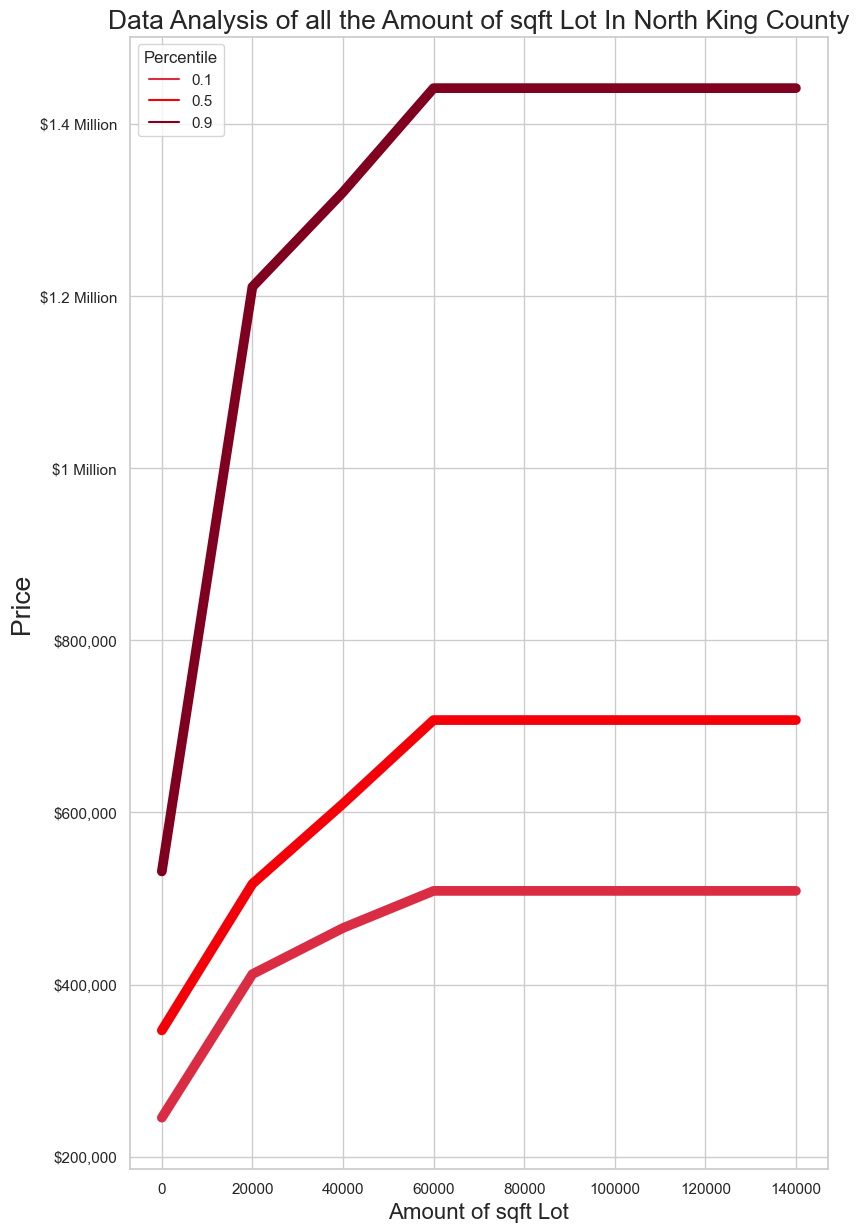

In [373]:
sns.set_style("whitegrid")
flatui = ["#DA2C43","#F40009","#800020"]
ax=sns.lineplot( data=melted_data8, x="Amount_of_sqft_lot",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Data Analysis of all the Amount of sqft Lot In North King County',size=19)
plt.xlabel("Amount of sqft Lot", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',
                      '$1.2 Million','$1.4 Million'])

In [375]:
(Quantile_regression7['Price'] > Quantile_regression7['0.1']).value_counts()

True     335
False     46
dtype: int64

In [376]:
i = 0
y= 0
x = []
while i < 335:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 46:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [377]:
(Quantile_regression7['Price'] > Quantile_regression7['0.5']).value_counts()

False    193
True     188
dtype: int64

In [359]:
i = 0
y= 0
x = []
while i < 193:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 188:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [360]:
(Quantile_regression7['Price'] > Quantile_regression7['0.9']).value_counts()

False    341
True      40
dtype: int64

In [361]:
i = 0
y= 0
x = []
while i < 341:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 40:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

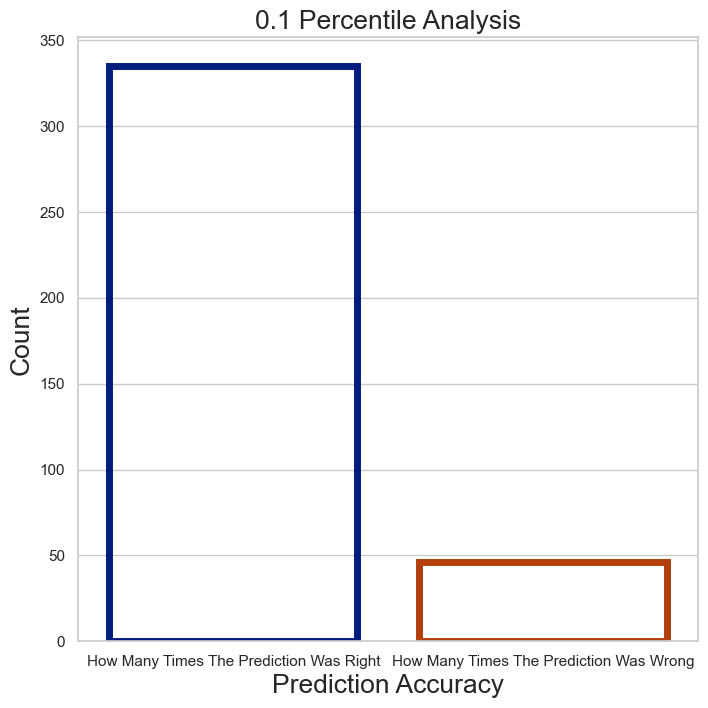

In [362]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

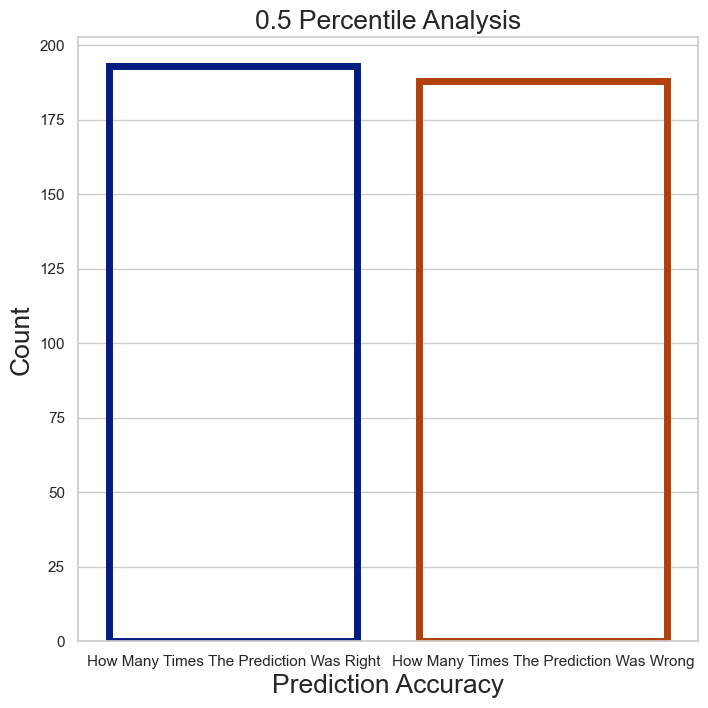

In [363]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

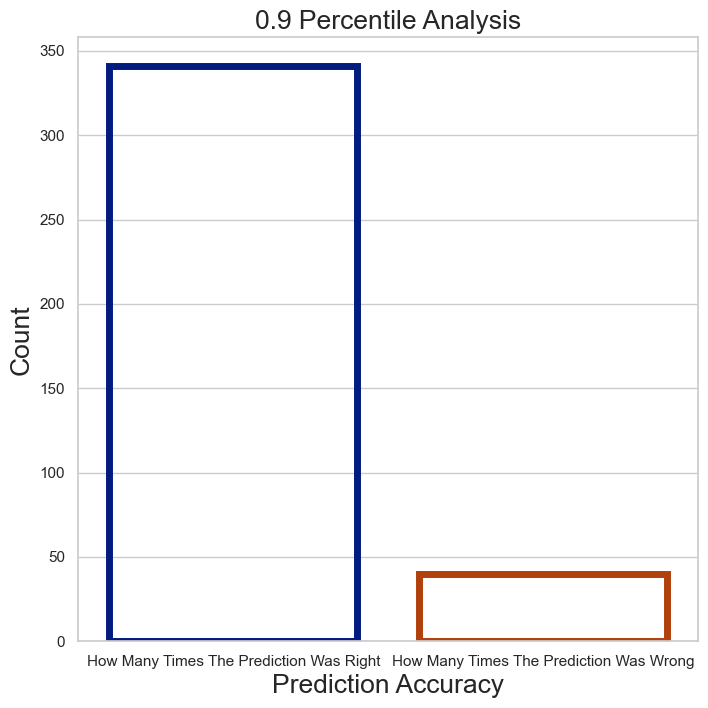

In [364]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [252]:
df_practise = pd.DataFrame({'x':[0,20000], 'y':[149846.03546339597,304388.18120976456]})
df_practise

x              y
0      0  149846.035463
1  50000  304388.181210

In [253]:
X_train, y_train = df_practise[['x']], df_practise[['y']]

In [254]:
classifiers = {}
for tau in [0.1]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [260]:
practise_regression = pd.DataFrame({'Amount_of_Lot': X_test.reset_index()['Amount_of_Lot'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              'Price': y_test.reset_index()['Price']})
practise_regression [350:]

Amount_of_Lot           0.1      Price
350           8551  180754.46875   350000.0
351           9324  180754.46875   410000.0
352           8663  180754.46875   460000.0
353          35689  180754.46875   730000.0
354           9052  180754.46875  1010000.0
355          45902  180754.46875   654950.0
356            952  180754.46875   205000.0
357           1016  180754.46875   535000.0
358          11245  180754.46875   421000.0
359           9196  180754.46875   357823.0
360           1000  180754.46875   450000.0
361          60373  180754.46875  1120000.0
362          11213  180754.46875   567000.0
363          43091  180754.46875   665000.0
364           6576  180754.46875   310000.0
365           8503  180754.46875   536000.0
366           1416  180754.46875   461000.0
367          28037  180754.46875   680000.0
368          21890  180754.46875   472000.0
369          75132  180754.46875   380000.0
370          28005  180754.46875   760000.0
371           9676  180754.46875   460000.0
372          10422  180754.46875  1150000.0
373          13566  180754.46875   414250.0
374          10518  180754.46875   351000.0
375          23779  180754.46875   582500.0
376           7451  180754.46875   352500.0
377           1336  180754.46875   479950.0
378          21810  180754.46875   840000.0
379          21794  180754.46875   875000.0
380          11549  180754.46875   525000.0

In [290]:
df_practise2 = pd.DataFrame({'x':[0,50000], 'y':[465067.6800205528,706440.9697925226]})
df_practise2

x              y
0      0  465067.680021
1  50000  706440.969793

In [291]:
X_train, y_train = df_practise2[['x']], df_practise2[['y']]

In [292]:
classifiers = {}
for tau in [0.1]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [293]:
practise_regression = pd.DataFrame({'Amount_of_Lot': X_test.reset_index()['Amount_of_Lot'],
              '0.9': classifiers['0.1']['predictions']['0.1'],
              'Price': y_test.reset_index()['Price']})
practise_regression [350:]

Amount_of_Lot         0.9      Price
350           8551  513342.375   350000.0
351           9324  513342.375   410000.0
352           8663  513342.375   460000.0
353          35689  513342.375   730000.0
354           9052  513342.375  1010000.0
355          45902  513342.375   654950.0
356            952  513342.375   205000.0
357           1016  513342.375   535000.0
358          11245  513342.375   421000.0
359           9196  513342.375   357823.0
360           1000  513342.375   450000.0
361          60373  513342.375  1120000.0
362          11213  513342.375   567000.0
363          43091  513342.375   665000.0
364           6576  513342.375   310000.0
365           8503  513342.375   536000.0
366           1416  513342.375   461000.0
367          28037  513342.375   680000.0
368          21890  513342.375   472000.0
369          75132  513342.375   380000.0
370          28005  513342.375   760000.0
371           9676  513342.375   460000.0
372          10422  513342.375  1150000.0
373          13566  513342.375   414250.0
374          10518  513342.375   351000.0
375          23779  513342.375   582500.0
376           7451  513342.375   352500.0
377           1336  513342.375   479950.0
378          21810  513342.375   840000.0
379          21794  513342.375   875000.0
380          11549  513342.375   525000.0

In [303]:
df_practise3 = pd.DataFrame({'x':[50000,100000], 'y':[324388.18120976456,352902.5470975493]})
df_practise3

x              y
0   50000  324388.181210
1  100000  352902.547098

In [304]:
X_train, y_train = df_practise3[['x']], df_practise3[['y']]

In [305]:
classifiers = {}
for tau in [0.1]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [306]:
practise_regression = pd.DataFrame({'Amount_of_Lot': X_test.reset_index()['Amount_of_Lot'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              'Price': y_test.reset_index()['Price']})
practise_regression [350:]

Amount_of_Lot          0.1      Price
350           8551  330091.0625   350000.0
351           9324  330091.0625   410000.0
352           8663  330091.0625   460000.0
353          35689  330091.0625   730000.0
354           9052  330091.0625  1010000.0
355          45902  330091.0625   654950.0
356            952  330091.0625   205000.0
357           1016  330091.0625   535000.0
358          11245  330091.0625   421000.0
359           9196  330091.0625   357823.0
360           1000  330091.0625   450000.0
361          60373  330091.0625  1120000.0
362          11213  330091.0625   567000.0
363          43091  330091.0625   665000.0
364           6576  330091.0625   310000.0
365           8503  330091.0625   536000.0
366           1416  330091.0625   461000.0
367          28037  330091.0625   680000.0
368          21890  330091.0625   472000.0
369          75132  330091.0625   380000.0
370          28005  330091.0625   760000.0
371           9676  330091.0625   460000.0
372          10422  330091.0625  1150000.0
373          13566  330091.0625   414250.0
374          10518  330091.0625   351000.0
375          23779  330091.0625   582500.0
376           7451  330091.0625   352500.0
377           1336  330091.0625   479950.0
378          21810  330091.0625   840000.0
379          21794  330091.0625   875000.0
380          11549  330091.0625   525000.0

In [311]:
df_practise4 = pd.DataFrame({'x':[50000,100000], 'y':[756440.9697925226,850206.110618093]})
df_practise4

x              y
0   50000  756440.969793
1  100000  850206.110618

In [312]:
X_train, y_train = df_practise4[['x']], df_practise4[['y']]

In [313]:
classifiers = {}
for tau in [0.1]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [314]:
practise_regression = pd.DataFrame({'Amount_of_Lot': X_test.reset_index()['Amount_of_Lot'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              'Price': y_test.reset_index()['Price']})
practise_regression [350:]

Amount_of_Lot       0.1      Price
350           8551  775194.0   350000.0
351           9324  775194.0   410000.0
352           8663  775194.0   460000.0
353          35689  775194.0   730000.0
354           9052  775194.0  1010000.0
355          45902  775194.0   654950.0
356            952  775194.0   205000.0
357           1016  775194.0   535000.0
358          11245  775194.0   421000.0
359           9196  775194.0   357823.0
360           1000  775194.0   450000.0
361          60373  775194.0  1120000.0
362          11213  775194.0   567000.0
363          43091  775194.0   665000.0
364           6576  775194.0   310000.0
365           8503  775194.0   536000.0
366           1416  775194.0   461000.0
367          28037  775194.0   680000.0
368          21890  775194.0   472000.0
369          75132  775194.0   380000.0
370          28005  775194.0   760000.0
371           9676  775194.0   460000.0
372          10422  775194.0  1150000.0
373          13566  775194.0   414250.0
374          10518  775194.0   351000.0
375          23779  775194.0   582500.0
376           7451  775194.0   352500.0
377           1336  775194.0   479950.0
378          21810  775194.0   840000.0
379          21794  775194.0   875000.0
380          11549  775194.0   525000.0

In [315]:
Predictions7 = []
for i in regressiondata8.Amount_of_Lot:
    if 0 <= i <= 50000:Predictions7.append('Between: $180,754 - $513,342') 
    if 50001 <= i <= 100000:Predictions7.append('Between: $330,091 - $775,194') 
    if 100001 <= i <= 400000:Predictions7.append('Between: $352,902- $850,206')
Predictions7

['Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between: $180,754 - $513,342',
 'Between:

In [316]:
price = []
for i in regressiondata8.Price:
    price.append("${:,.0f}".format(i))
len(price)

3809

In [317]:
Prediction8 = pd.DataFrame({'Amount_of_sqft_lot': regressiondata8.Amount_of_Lot,
                           'Prediction':Predictions7,'Actual Price':price})
Prediction8

Amount_of_sqft_lot                    Prediction Actual Price
0                   5000  Between: $180,754 - $513,342     $560,000
1                   5000  Between: $180,754 - $513,342     $470,000
2                   5000  Between: $180,754 - $513,342     $455,000
3                   5000  Between: $180,754 - $513,342     $640,000
4                   5000  Between: $180,754 - $513,342     $280,300
...                  ...                           ...          ...
3826                7451  Between: $180,754 - $513,342     $352,500
3827                1336  Between: $180,754 - $513,342     $479,950
3828               21810  Between: $180,754 - $513,342     $840,000
3829               21794  Between: $180,754 - $513,342     $875,000
3830               11549  Between: $180,754 - $513,342     $525,000

[3809 rows x 3 columns]